# Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import datetime
from pandas_datareader import data as pdr
import yfinance as yf

import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
ind_prod_goods = pd.read_csv('daily_industrial_production.csv')
bill_rates = pd.read_csv('daily_3_month_tbill_rate.csv')
equity_mkt_vol = pd.read_csv('EMV_IDT Index.csv')
unemployment = pd.read_csv('daily_unemployment_rate.csv')
equity_mkt_uncertainty = pd.read_csv('EMU Index.csv')
equity_policy_uncertainty = pd.read_csv('EPU Index.csv')

equity_trading_funds = pd.read_csv('ETFs_daily.csv')

In [3]:
equity_trading_funds

Date        DBA         GLD         USO
0     2008-01-02  30.408634   84.860001  627.760010
1     2008-01-03  31.127235   85.570000  626.960022
2     2008-01-04  31.454702   85.129997  618.479980
3     2008-01-07  31.036274   84.769997  604.000000
4     2008-01-08  31.381929   86.779999  608.479980
...          ...        ...         ...         ...
4104  2024-04-23  25.950001  215.039993   79.980003
4105  2024-04-24  26.540001  214.639999   79.639999
4106  2024-04-25  26.170000  215.919998   80.440002
4107  2024-04-26  26.040001  216.619995   80.389999
4108  2024-04-29  25.100000  216.179993   79.500000

[4109 rows x 4 columns]

In [4]:
print(ind_prod_goods.head())
print(bill_rates.head())
print(equity_mkt_vol.head())
print(unemployment.head())
print(equity_mkt_uncertainty.head())
print(equity_policy_uncertainty.head())

print(equity_trading_funds.head())

         DATE     IPCONGD
0  2008-01-01  108.870600
1  2008-01-02  108.865429
2  2008-01-03  108.860258
3  2008-01-04  108.855087
4  2008-01-05  108.849916
         DATE  DTB3
0  2008-01-01   NaN
1  2008-01-02  3.18
2  2008-01-03  3.16
3  2008-01-04  3.12
4  2008-01-07  3.19
         DATE INFECTDISEMVTRACKD
0  2008-01-01            0.68000
1  2008-01-02            0.47000
2  2008-01-03            0.36000
3  2008-01-04            0.00000
4  2008-01-05            0.00000
         DATE    UNRATE
0  2008-01-01  5.000000
1  2008-01-02  4.996774
2  2008-01-03  4.993548
3  2008-01-04  4.990323
4  2008-01-05  4.987097
       DATE  WLEMUINDXD
0  1/1/2008      149.95
1  2/1/2008       97.01
2  3/1/2008       12.12
3  4/1/2008       45.17
4  5/1/2008      143.82
         DATE  USEPUINDXD
0  2008-01-01      232.87
1  2008-01-02       83.14
2  2008-01-03      189.34
3  2008-01-04      103.24
4  2008-01-05      281.75
         Date        DBA        GLD         USO
0  2008-01-02  30.408634  84.86000

In [5]:
ind_prod_goods.rename(columns={'DATE': 'date', 'IPCONGD': 'ind_prod_goods'}, inplace=True)
ind_prod_goods['date'] = pd.to_datetime(ind_prod_goods['date'])
ind_prod_goods.sort_values('date', inplace=True)

bill_rates.rename(columns={'DATE': 'date', 'DTB3': 'bill_rates'}, inplace=True)
bill_rates['date'] = pd.to_datetime(bill_rates['date'])
bill_rates.sort_values('date', inplace=True)

equity_mkt_vol.rename(columns={'DATE': 'date', 'INFECTDISEMVTRACKD': 'equity_mkt_vol'}, inplace=True)
equity_mkt_vol['date'] = pd.to_datetime(equity_mkt_vol['date'])
equity_mkt_vol.sort_values('date', inplace=True)

unemployment.rename(columns={'DATE': 'date', 'UNRATE': 'unemployment'}, inplace=True)
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment.sort_values('date', inplace=True)

equity_mkt_uncertainty.rename(columns={'DATE': 'date', 'WLEMUINDXD': 'equity_mkt_uncertainty'}, inplace=True)
equity_mkt_uncertainty['date'] = pd.to_datetime(equity_mkt_uncertainty['date'], format='%d/%m/%Y')
equity_mkt_uncertainty.sort_values('date', inplace=True)

equity_policy_uncertainty.rename(columns={'DATE': 'date', 'USEPUINDXD': 'equity_policy_uncertainty'}, inplace=True)
equity_policy_uncertainty['date'] = pd.to_datetime(equity_policy_uncertainty['date'])
equity_policy_uncertainty.sort_values('date', inplace=True)

equity_trading_funds.rename(columns={'Date': 'date', 'DBA': 'ETF_DBA', 'GLD': 'ETF_GLD', 'USO': 'ETF_USO'},
                            inplace=True)
equity_trading_funds['date'] = pd.to_datetime(equity_trading_funds['date'])
equity_trading_funds.sort_values('date', inplace=True)

In [6]:
print(ind_prod_goods.head())
print(bill_rates.head())
print(equity_mkt_vol.head())
print(unemployment.head())
print(equity_mkt_uncertainty.head())
print(equity_policy_uncertainty.head())
print(equity_trading_funds.head())

        date  ind_prod_goods
0 2008-01-01      108.870600
1 2008-01-02      108.865429
2 2008-01-03      108.860258
3 2008-01-04      108.855087
4 2008-01-05      108.849916
        date  bill_rates
0 2008-01-01         NaN
1 2008-01-02        3.18
2 2008-01-03        3.16
3 2008-01-04        3.12
4 2008-01-07        3.19
        date equity_mkt_vol
0 2008-01-01        0.68000
1 2008-01-02        0.47000
2 2008-01-03        0.36000
3 2008-01-04        0.00000
4 2008-01-05        0.00000
        date  unemployment
0 2008-01-01      5.000000
1 2008-01-02      4.996774
2 2008-01-03      4.993548
3 2008-01-04      4.990323
4 2008-01-05      4.987097
        date  equity_mkt_uncertainty
0 2008-01-01                  149.95
1 2008-01-02                   97.01
2 2008-01-03                   12.12
3 2008-01-04                   45.17
4 2008-01-05                  143.82
        date  equity_policy_uncertainty
0 2008-01-01                     232.87
1 2008-01-02                      83.14
2 20

In [7]:
merged_df = ind_prod_goods.merge(bill_rates, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_vol, on='date', how='inner')
merged_df = merged_df.merge(unemployment, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_uncertainty, on='date', how='inner')
merged_df = merged_df.merge(equity_policy_uncertainty, on='date', how='inner')

merged_df_dba = merged_df.merge(equity_trading_funds[['date', 'ETF_DBA']], on='date', how='inner')
merged_df_dba.dropna(axis=0, how='any', inplace=True) 
merged_df_dba.to_csv('Merged_Dataset_DBA.csv', index=False)
merged_df_dba.isnull().sum()
merged_df_dba.info()


merged_df_gld = merged_df.merge(equity_trading_funds[['date', 'ETF_GLD']], on='date', how='inner')
merged_df_gld.dropna(axis=0, how='any', inplace=True)  
merged_df_gld.to_csv('Merged_Dataset_GLD.csv', index=False)
merged_df_gld.isnull().sum()
merged_df_gld.info()

merged_df_uso = merged_df.merge(equity_trading_funds[['date', 'ETF_USO']], on='date', how='inner')
merged_df_uso.dropna(axis=0, how='any', inplace=True)  
merged_df_uso.to_csv('Merged_Dataset_USO.csv', index=False)
merged_df_uso.isnull().sum()
merged_df_uso.info()

date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_DBA                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_DBA                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_GLD                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_GLD                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_USO                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_USO                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


# Feature Engineering

In [8]:
# Define your feature calculation functions
def calculate_sma(data, window, column_name):
    """Calculate Simple Moving Average."""
    data[f"SMA_{window}"] = data[column_name].rolling(window).mean()
    return data

def calculate_ema(data, window, column_name):
    """Calculate Exponential Moving Average."""
    data[f"EMA_{window}"] = data[column_name].ewm(span=window, ignore_na=True).mean()
    return data

def calculate_macd(data, column_name, short_window=12, long_window=26, signal_window=9):
    """Calculate Moving Average Convergence Divergence."""
    short_ema = data[column_name].ewm(span=short_window, adjust=False).mean()
    long_ema = data[column_name].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    data["MACD"] = macd_line
    data["MACD_SIGNAL"] = signal_line
    return data

def calculate_mfi(data, column_name, period=14):
    """Calculate Money Flow Index."""
    tp = (data['High'] + data['Low'] + data[column_name]) / 3
    rmf = tp * data['Volume']
    pos_flow = ((tp.diff() > 0) * rmf).rolling(window=period).sum()
    neg_flow = ((tp.diff() < 0) * rmf).rolling(window=period).sum()
    mfi = 100 - (100 / (1 + (pos_flow / neg_flow)))
    data["MFI"] = mfi
    return data

def calculate_obv(data, column_name):
    """Calculate On-Balance Volume."""
    obv = [0]
    for i in range(1, len(data)):
        if data[column_name][i] > data[column_name][i-1]:
            obv.append(obv[-1] + data['Volume'][i])
        elif data[column_name][i] < data[column_name][i-1]:
            obv.append(obv[-1] - data['Volume'][i])
        else:
            obv.append(obv[-1])
    data["OBV"] = obv
    return data

def calculate_rsi(data, column_name, period, use_ema=True):
    """Calculate Relative Strength Index."""
    delta = data[column_name].diff()
    up, down = delta.clip(lower=0), -delta.clip(upper=0)
    if use_ema:
        ma_up = up.ewm(com=period-1, adjust=True).mean()
        ma_down = down.ewm(com=period-1, adjust=True).mean()
    else:
        ma_up = up.rolling(window=period).mean()
        ma_down = down.rolling(window=period).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    data[f"RSI_{period}"] = rsi
    return data

def calculate_stochastic(data, column_name, window):
    """Calculate Stochastic Oscillator."""
    low_min = data[column_name].rolling(window=window).min()
    high_max = data[column_name].rolling(window=window).max()
    data[f"STOCH_{window}_k"] = 100 * (data[column_name] - low_min) / (high_max - low_min)
    data[f"STOCH_{window}_d"] = data[f"STOCH_{window}_k"].rolling(window=3).mean()
    return data

def calculate_wad(data, column_name):
    """Calculate Williams Accumulation Distribution."""
    mfm = ((data[column_name] - data['Low']) - (data['High'] - data[column_name])) / (data['High'] - data['Low'])
    data['WAD'] = (mfm * data['Volume']).cumsum()
    return data

def calculate_rate_of_change(data, window, column_name):
    """Calculate Rate of Change."""
    data[f"ROC_{window}"] = data[column_name].pct_change(periods=window) * 100
    return data

def calculate_lagged_features(data, column_name, lags):
    """Calculate Lagged Features."""
    for lag in range(1, lags + 1):
        data[f"LAG_{lag}"] = data[column_name].shift(lag)
    return data

def create_signals(df, column_name):
    """ Create signals based on price movement: 1 for up, 0 for down """
    df['Previous'] = df[column_name].shift(1)
    df['Signal'] = (df[column_name] > df['Previous']).astype(int)
    df.drop(['Previous'], axis=1, inplace=True)
    return df

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [9]:
merged_df_dba = calculate_sma(merged_df_dba, 50, 'ETF_DBA')
merged_df_dba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_DBA                    4039 non-null   float64       
 8   SMA_50                     3990 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 315.5+ KB


In [10]:
# Main code to generate the data
start_date = datetime.date(2008, 1, 1)  
end_date = datetime.date(2024, 3, 31)   
datasets = [merged_df_dba, merged_df_gld, merged_df_uso]
ticker_columns = ['ETF_DBA', 'ETF_GLD', 'ETF_USO']

filenames = ['DBA_with_indicators.csv', 'GLD_with_indicators.csv', 'USO_with_indicators.csv']

# loop of our files and their columns
for dataset, ticker_column, filename in zip(datasets, ticker_columns, filenames):
    df = dataset.copy()
    
    # calculate tech features
    sma_list = [50, 200]
    ema_list = [10, 30, 200]
    rsi_list = [10, 30, 200]
    stochastic_list = [10, 30, 200]
    rate_of_change_list = [10, 30]

    for val in sma_list:
        df = calculate_sma(df, val, ticker_column)

    for val in ema_list:
        df = calculate_ema(df, val, ticker_column)

    df = calculate_macd(df, ticker_column)
    # df = calculate_mfi(df, ticker_column)
    # df = calculate_obv(df, ticker_column)

    for val in rsi_list:
        df = calculate_rsi(df, ticker_column, val)

    for val in stochastic_list:
        df = calculate_stochastic(df, ticker_column, val)

    for val in rate_of_change_list:
        df = calculate_rate_of_change(df, val, ticker_column)

    # df = calculate_wad(df, ticker_column)

    df.set_index('date', inplace=True)  # set 'Date' column as index
    
    # Get data and merge
    additional_tickers = ["^VIX", "^OVX", "^VXN", "EPU", "ADX.AX"]
    for additional_ticker in additional_tickers:
        additional_df = get_data(additional_ticker, start_date, end_date)
    
        # Use merge to merge data, ensuring alignment by date index
        df = df.merge(additional_df['Adj Close'].rename(f"{additional_ticker}"), left_index=True, right_index=True, how='left')




    df["returns"] = np.log(df[ticker_column] / df[ticker_column].shift(1))

    lags = 5
    df = calculate_lagged_features(df, "returns", lags)

    # df = df.dropna()

    # output out data to csv
    df.to_csv(filename, index=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
dba_with_indicators = pd.read_csv('DBA_with_indicators.csv')
gld_with_indicators = pd.read_csv('GLD_with_indicators.csv')
uso_with_indicators = pd.read_csv('USO_with_indicators.csv')

dba_with_indicators.dropna(axis=0, how='any', inplace=True) 
gld_with_indicators.dropna(axis=0, how='any', inplace=True) 
uso_with_indicators.dropna(axis=0, how='any', inplace=True) 

dba_with_indicators['PnL'] = np.sign(dba_with_indicators['returns'])
gld_with_indicators['PnL'] = np.sign(gld_with_indicators['returns'])
uso_with_indicators['PnL'] = np.sign(uso_with_indicators['returns'])
dba_with_indicators['PnL'] = dba_with_indicators['PnL'].clip(lower=0)
gld_with_indicators['PnL'] = gld_with_indicators['PnL'].clip(lower=0)
uso_with_indicators['PnL'] = uso_with_indicators['PnL'].clip(lower=0)

dba_with_indicators.info()
gld_with_indicators.info()
uso_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594 entries, 368 to 4038
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ind_prod_goods             3594 non-null   float64
 1   bill_rates                 3594 non-null   float64
 2   equity_mkt_vol             3594 non-null   object 
 3   unemployment               3594 non-null   float64
 4   equity_mkt_uncertainty     3594 non-null   float64
 5   equity_policy_uncertainty  3594 non-null   float64
 6   ETF_DBA                    3594 non-null   float64
 7   SMA_50                     3594 non-null   float64
 8   SMA_200                    3594 non-null   float64
 9   EMA_10                     3594 non-null   float64
 10  EMA_30                     3594 non-null   float64
 11  EMA_200                    3594 non-null   float64
 12  MACD                       3594 non-null   float64
 13  MACD_SIGNAL                3594 non-null   flo

In [12]:
features_to_scale_dba = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

features_to_scale_gld = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_GLD',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

features_to_scale_uso = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_USO',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

# dba_with_indicators = dba_with_indicators[features_to_scale_dba]
# gld_with_indicators = gld_with_indicators[features_to_scale_gld]
# uso_with_indicators = uso_with_indicators[features_to_scale_uso]

for column in features_to_scale_dba:
    dba_with_indicators.loc[:, column] = pd.to_numeric(dba_with_indicators.loc[:, column], errors='coerce')
for column in features_to_scale_gld:
    gld_with_indicators.loc[:, column] = pd.to_numeric(gld_with_indicators.loc[:, column], errors='coerce')
for column in features_to_scale_uso:
    uso_with_indicators.loc[:, column] = pd.to_numeric(uso_with_indicators.loc[:, column], errors='coerce')

dba_with_indicators.loc[:, features_to_scale_dba] = dba_with_indicators[features_to_scale_dba].fillna(
    dba_with_indicators[features_to_scale_dba].mean())
gld_with_indicators.loc[:, features_to_scale_gld] = gld_with_indicators[features_to_scale_gld].fillna(
    gld_with_indicators[features_to_scale_gld].mean())
uso_with_indicators.loc[:, features_to_scale_uso] = uso_with_indicators[features_to_scale_uso].fillna(
    uso_with_indicators[features_to_scale_uso].mean())

scaler = StandardScaler()
dba_with_indicators.loc[:, features_to_scale_dba] = scaler.fit_transform(dba_with_indicators[features_to_scale_dba])
gld_with_indicators.loc[:, features_to_scale_gld] = scaler.fit_transform(gld_with_indicators[features_to_scale_gld])
uso_with_indicators.loc[:, features_to_scale_uso] = scaler.fit_transform(uso_with_indicators[features_to_scale_uso])

In [13]:
dba_with_indicators.columns

Index(['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
       'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
       'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
       'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
       'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
       'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX', 'returns',
       'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5', 'PnL'],
      dtype='object')

In [14]:
def heatmap_for_indicators(df, df_name):
    internal_chars = [
        'ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
        'equity_mkt_uncertainty', 'equity_policy_uncertainty',
        'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
        'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
        'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
        'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
        'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5'
    ]

    corrmat = df[internal_chars].corr()

    plt.subplots(figsize=(20, 16))
    sns.heatmap(corrmat, square=False, linewidths=.5, annot=True, cmap='coolwarm')

    plt.title(f"Correlation Heatmap for {df_name}")

    plt.show()


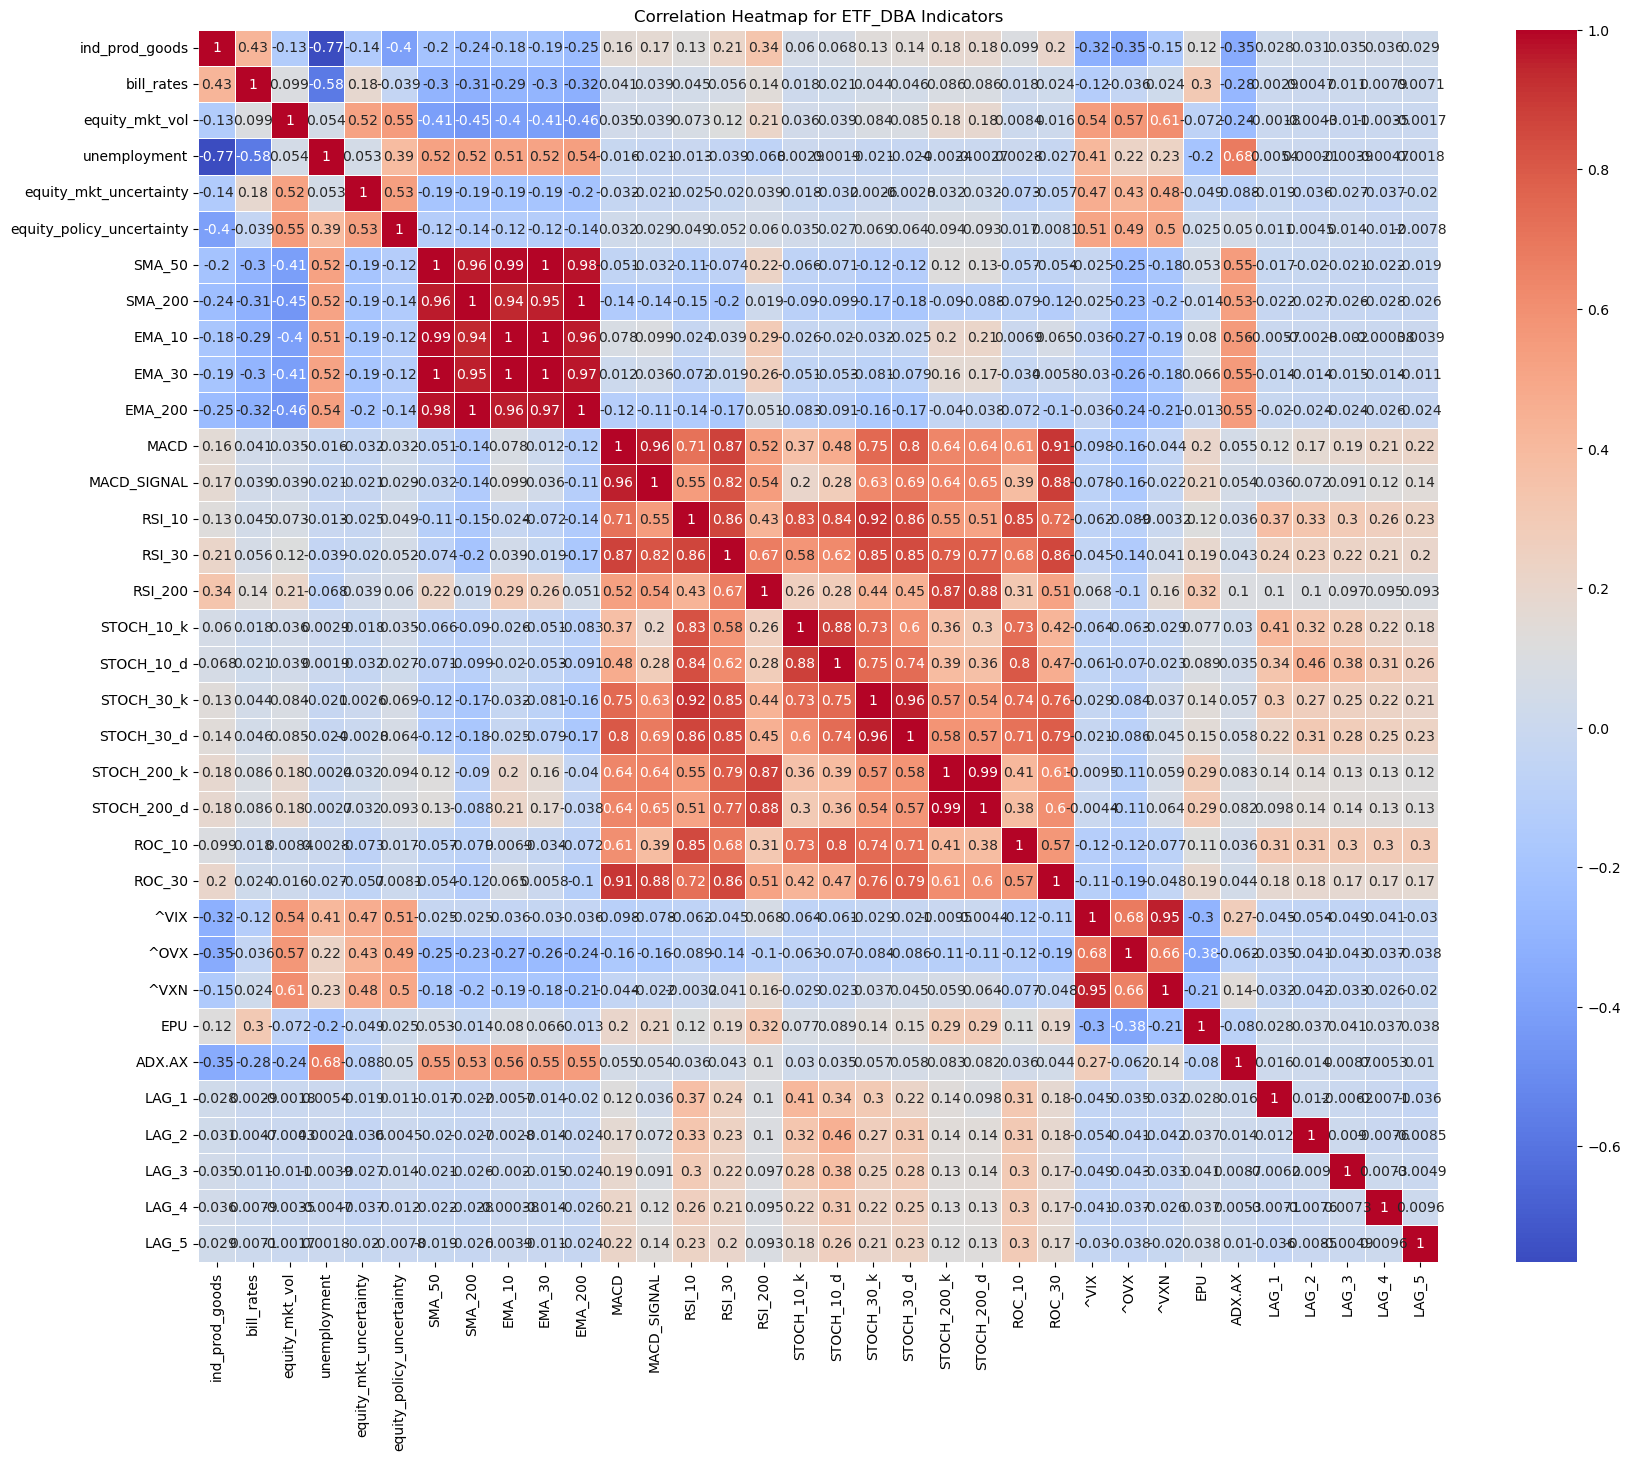

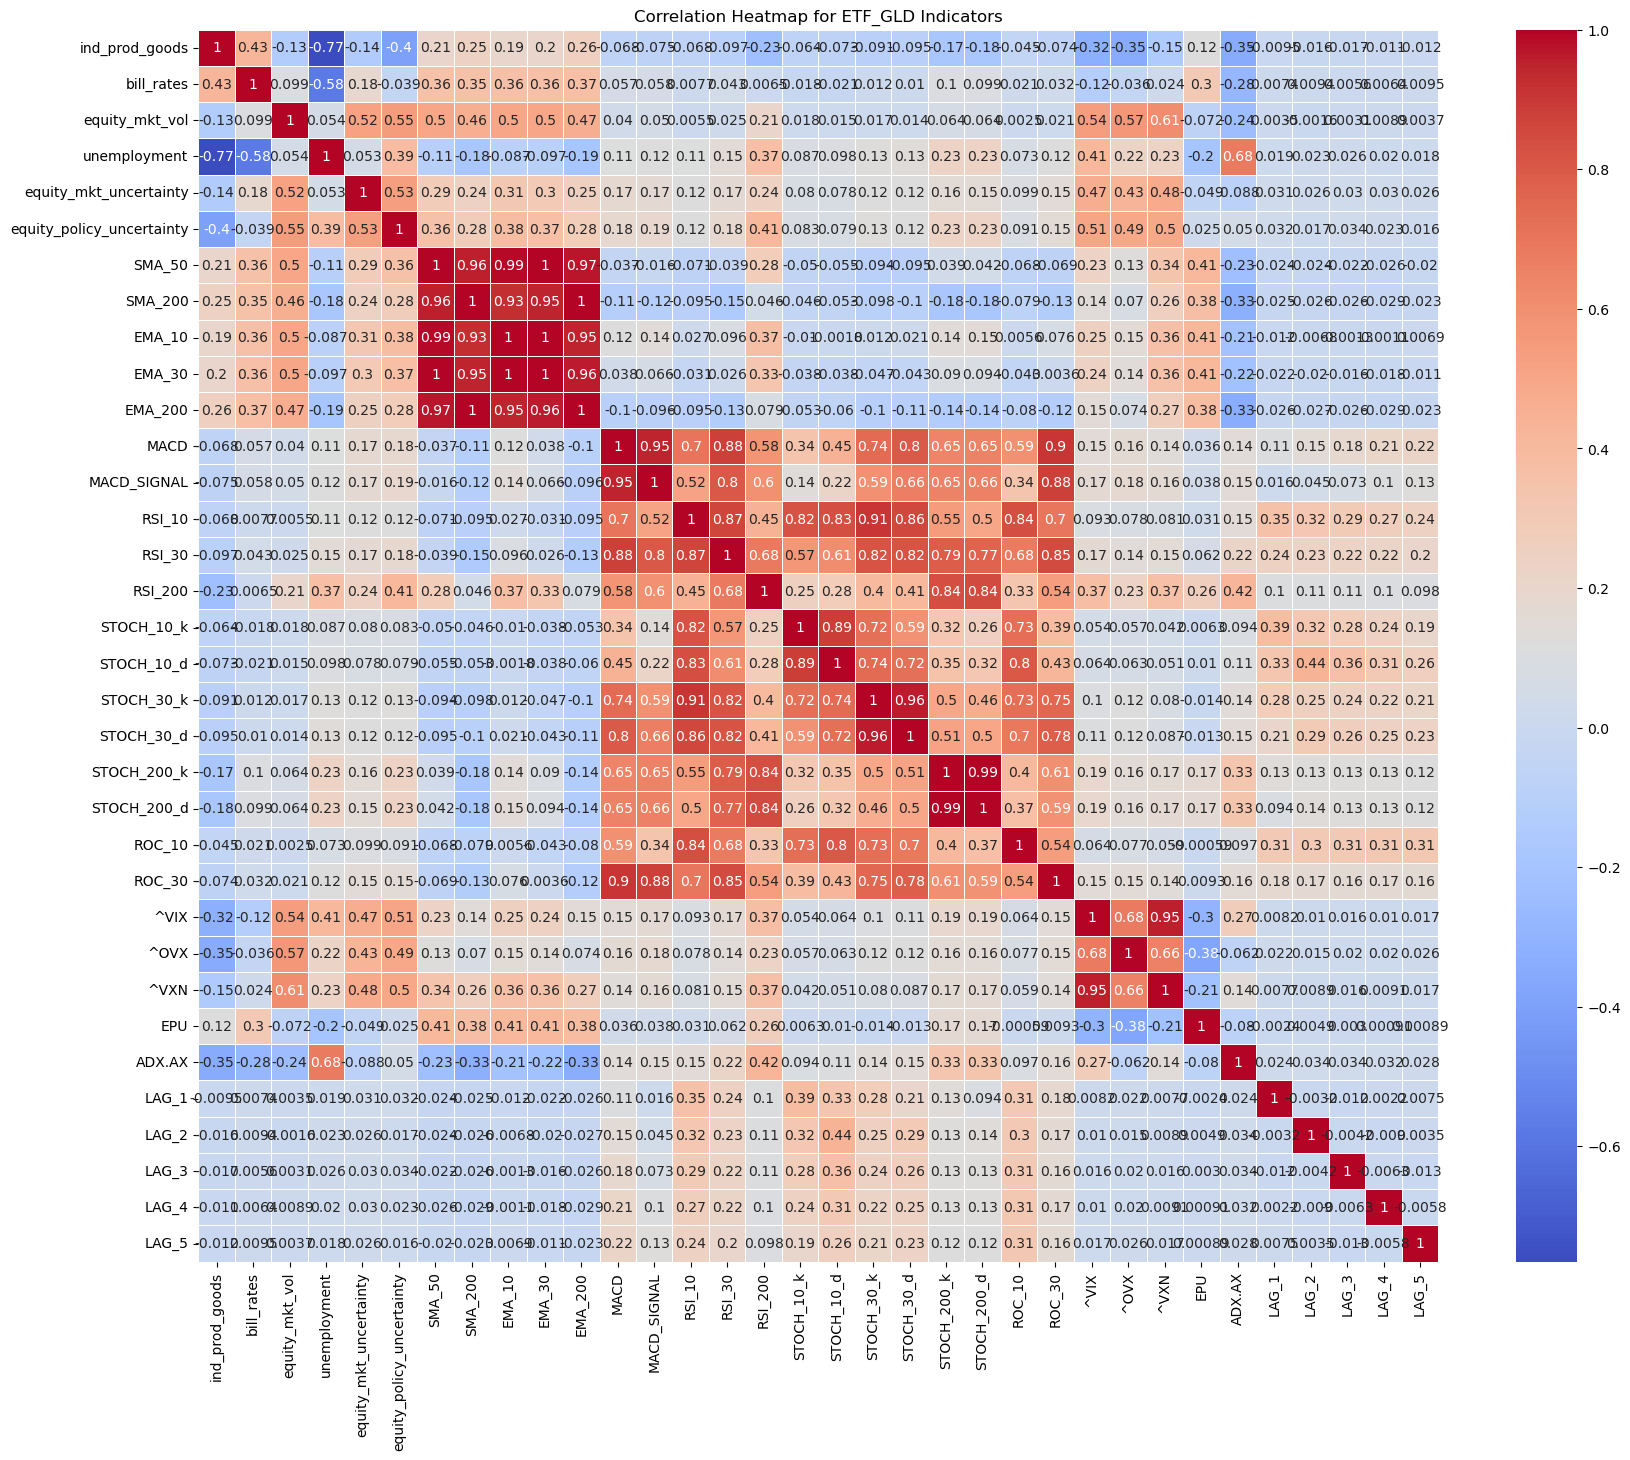

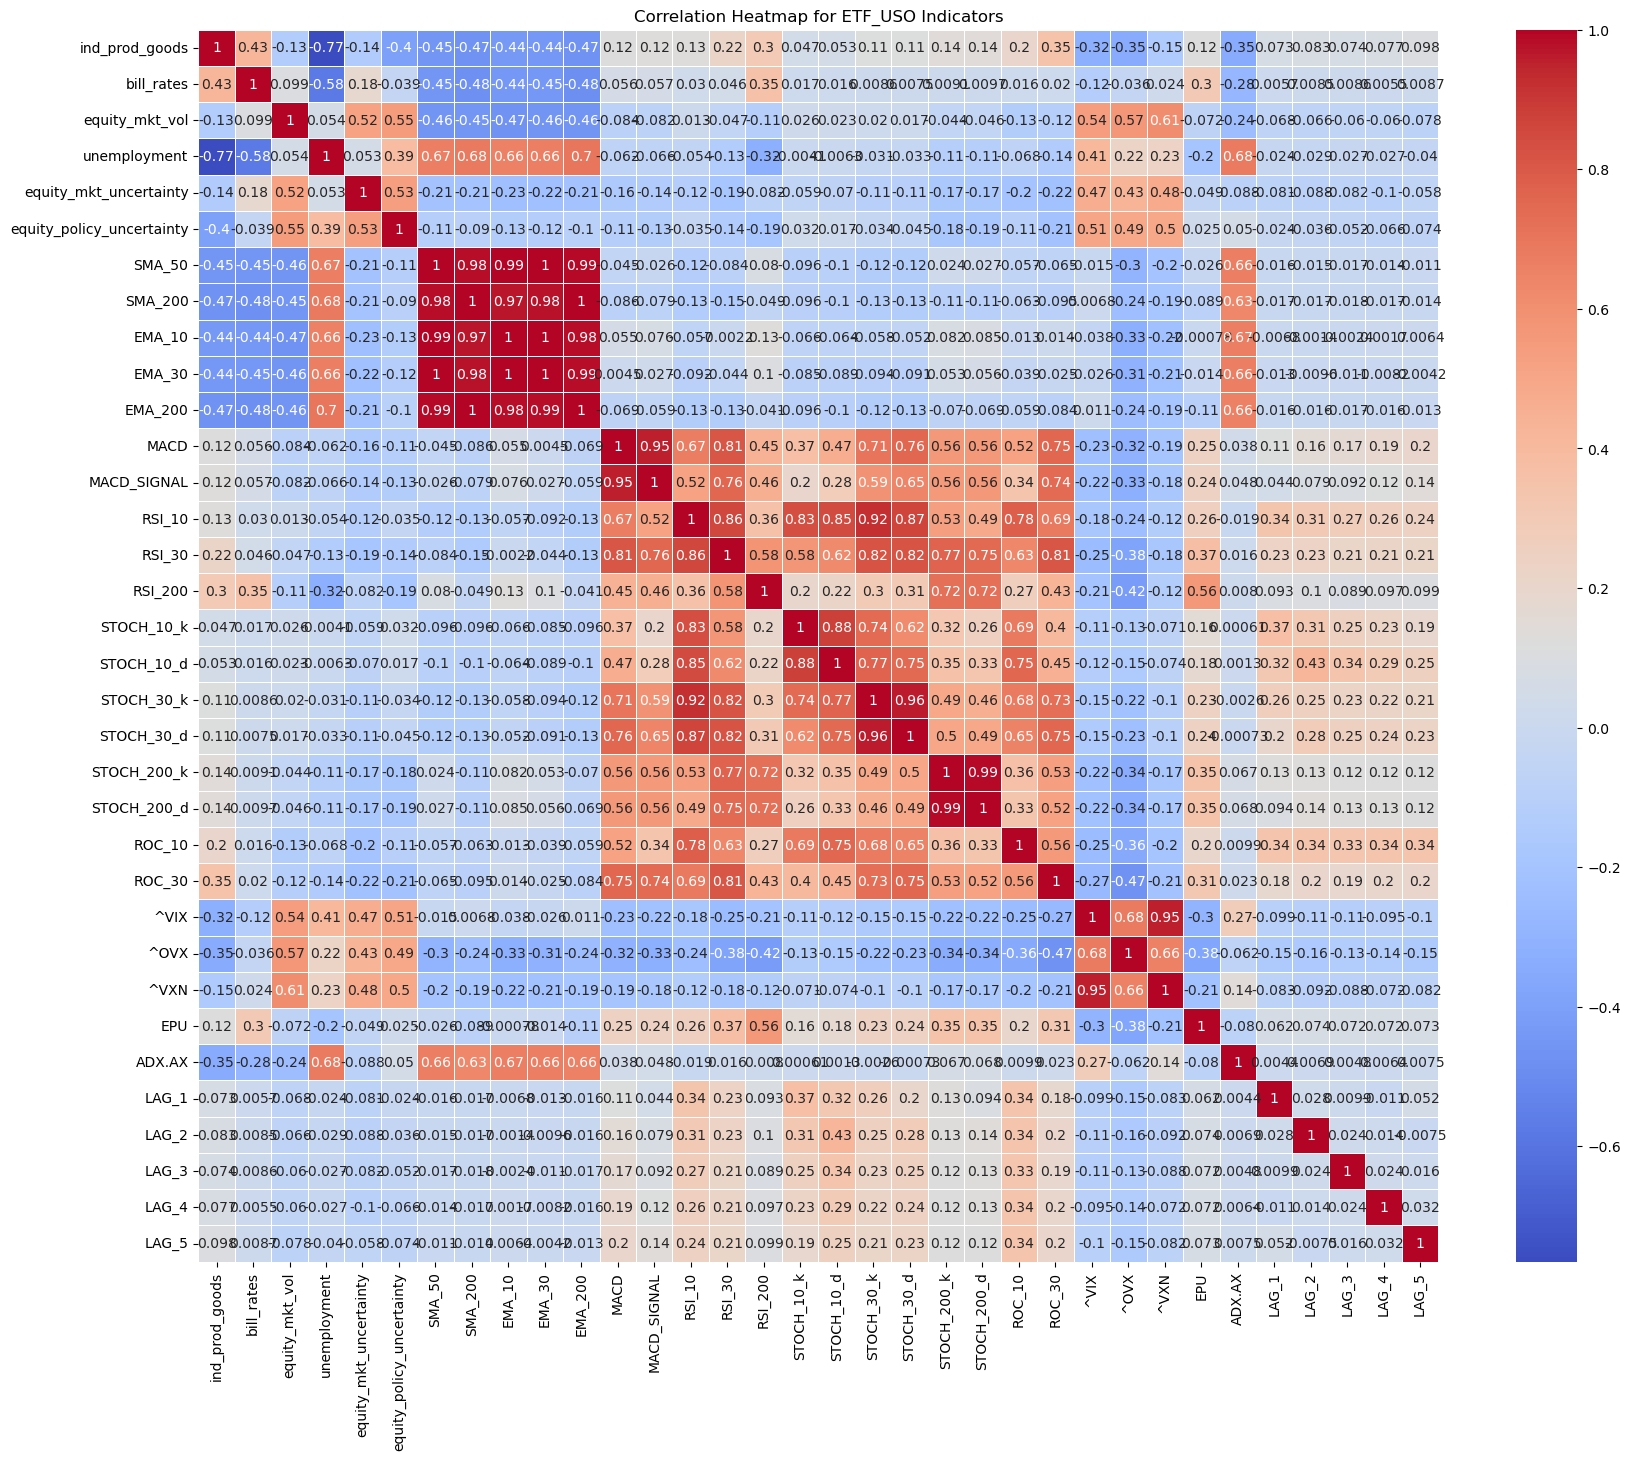

In [15]:
heatmap_for_indicators(dba_with_indicators, 'ETF_DBA Indicators')
heatmap_for_indicators(gld_with_indicators, 'ETF_GLD Indicators')
heatmap_for_indicators(uso_with_indicators, 'ETF_USO Indicators')

## PCA

In [16]:
corr_matrix_dba = dba_with_indicators.drop(['PnL'], axis = 1).corr().abs()
corr_matrix_gld = gld_with_indicators.drop(['PnL'], axis = 1).corr().abs()
corr_matrix_uso = uso_with_indicators.drop(['PnL'], axis = 1).corr().abs()

In [17]:
# Extract highly collinear feature pairs

def get_high_corr_features(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
    return high_corr_pairs

high_corr_features_dba = get_high_corr_features(corr_matrix_dba)
high_corr_features_gld = get_high_corr_features(corr_matrix_gld)
high_corr_features_uso = get_high_corr_features(corr_matrix_uso)

print('High correlation features in DBA:')
print(high_corr_features_dba)

print('\nHigh correlation features in GLD:')
print(high_corr_features_gld)

print('\nHigh correlation features in USO:')
print(high_corr_features_uso)

High correlation features in DBA:
[('SMA_50', 'ETF_DBA'), ('SMA_200', 'ETF_DBA'), ('SMA_200', 'SMA_50'), ('EMA_10', 'ETF_DBA'), ('EMA_10', 'SMA_50'), ('EMA_10', 'SMA_200'), ('EMA_30', 'ETF_DBA'), ('EMA_30', 'SMA_50'), ('EMA_30', 'SMA_200'), ('EMA_30', 'EMA_10'), ('EMA_200', 'ETF_DBA'), ('EMA_200', 'SMA_50'), ('EMA_200', 'SMA_200'), ('EMA_200', 'EMA_10'), ('EMA_200', 'EMA_30'), ('MACD_SIGNAL', 'MACD'), ('RSI_30', 'MACD'), ('RSI_30', 'MACD_SIGNAL'), ('RSI_30', 'RSI_10'), ('STOCH_10_k', 'RSI_10'), ('STOCH_10_d', 'RSI_10'), ('STOCH_10_d', 'STOCH_10_k'), ('STOCH_30_k', 'RSI_10'), ('STOCH_30_k', 'RSI_30'), ('STOCH_30_d', 'MACD'), ('STOCH_30_d', 'RSI_10'), ('STOCH_30_d', 'RSI_30'), ('STOCH_30_d', 'STOCH_30_k'), ('STOCH_200_k', 'RSI_200'), ('STOCH_200_d', 'RSI_200'), ('STOCH_200_d', 'STOCH_200_k'), ('ROC_10', 'RSI_10'), ('ROC_10', 'STOCH_10_d'), ('ROC_30', 'MACD'), ('ROC_30', 'MACD_SIGNAL'), ('ROC_30', 'RSI_30'), ('^VXN', '^VIX')]

High correlation features in GLD:
[('SMA_50', 'ETF_GLD'), ('SM

In [18]:
# Get a list of unique highly autocorrelated features

def get_unique_features(high_corr_features):
    features = set()
    for pair in high_corr_features:
        features.update(pair)
    return list(features)

unique_features_dba = get_unique_features(high_corr_features_dba)
unique_features_gld = get_unique_features(high_corr_features_gld)
unique_features_uso = get_unique_features(high_corr_features_uso)

In [19]:
print(unique_features_dba)

['STOCH_30_d', 'ROC_10', 'STOCH_10_k', '^VXN', 'ROC_30', 'EMA_30', 'RSI_200', 'MACD', 'SMA_200', '^VIX', 'RSI_10', 'STOCH_30_k', 'STOCH_200_d', 'EMA_200', 'RSI_30', 'MACD_SIGNAL', 'EMA_10', 'STOCH_10_d', 'ETF_DBA', 'SMA_50', 'STOCH_200_k']


In [20]:
# PCA
def apply_pca(data, features, n_components):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data[features])
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PCA_{i+1}' for i in range(n_components)])
    return pca_df, pca

n_components = 2

pca_dba_df, pca_dba = apply_pca(dba_with_indicators, unique_features_dba, n_components)
pca_gld_df, pca_gld = apply_pca(gld_with_indicators, unique_features_gld, n_components)
pca_uso_df, pca_uso = apply_pca(uso_with_indicators, unique_features_uso, n_components)

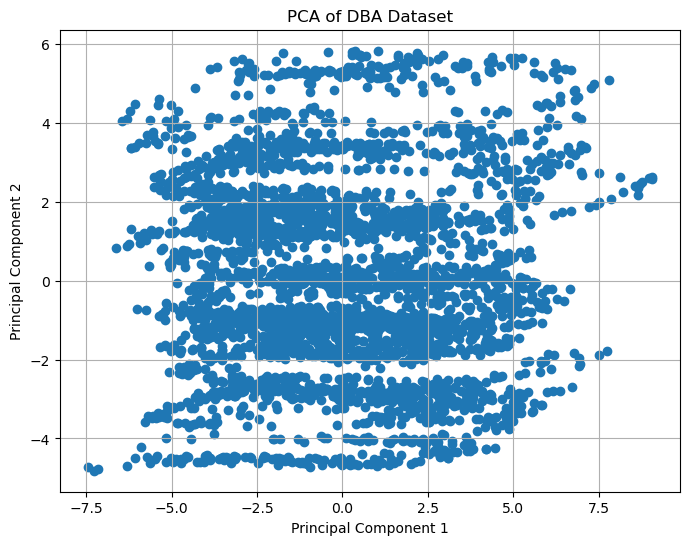

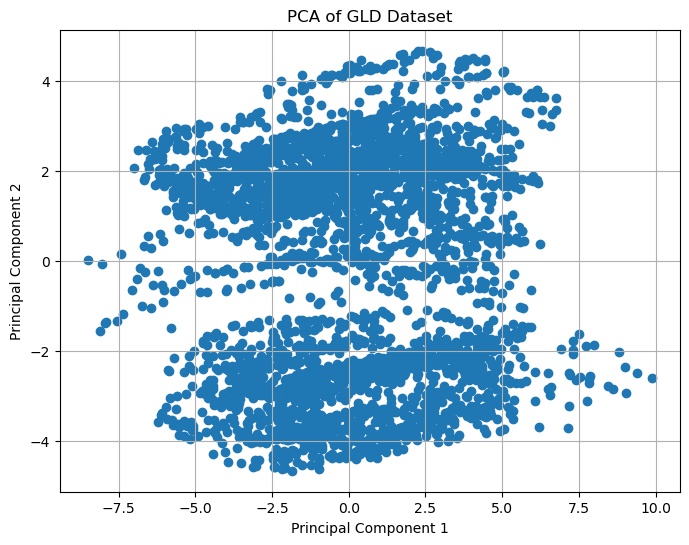

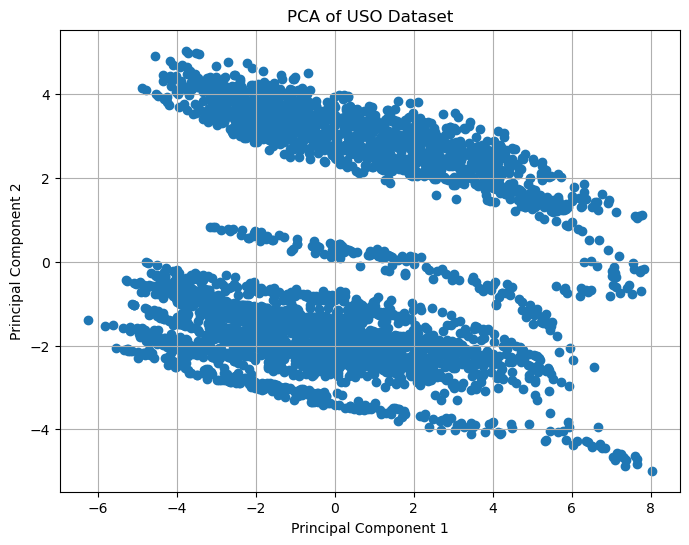

In [21]:
def plot_pca_results(pca_df, labels=None, title='PCA Plot'):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        unique_labels = set(labels)
        for label in unique_labels:
            indices = [i for i, l in enumerate(labels) if l == label]
            plt.scatter(pca_df.iloc[indices, 0], pca_df.iloc[indices, 1], label=label)
        plt.legend()
    else:
        plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1])
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

    
plot_pca_results(pca_dba_df, title='PCA of DBA Dataset')
plot_pca_results(pca_gld_df, title='PCA of GLD Dataset')
plot_pca_results(pca_uso_df, title='PCA of USO Dataset')

In [22]:
# check the shape of our data

print(dba_with_indicators.shape)
print(pca_dba_df.shape)
print(gld_with_indicators.shape)
print(pca_gld_df.shape)
print(uso_with_indicators.shape)
print(pca_uso_df.shape)

(3594, 37)
(3594, 2)
(3594, 37)
(3594, 2)
(3594, 37)
(3594, 2)


In [23]:
dba_with_indicators.reset_index(drop=True, inplace=True)
pca_dba_df.reset_index(drop=True, inplace=True)
gld_with_indicators.reset_index(drop=True, inplace=True)
pca_gld_df.reset_index(drop=True)
uso_with_indicators.reset_index(drop=True, inplace=True)
pca_uso_df.reset_index(drop=True)

PCA_1     PCA_2
0    -1.524266  3.789991
1    -1.471647  3.822892
2    -1.241145  3.926115
3    -0.118679  4.195813
4     0.265179  4.289950
...        ...       ...
3589  1.247988 -4.085993
3590  1.135278 -4.086834
3591  1.518772 -4.057755
3592  2.208393 -3.971841
3593  3.537005 -3.924112

[3594 rows x 2 columns]

PCA_1     PCA_2
0    -0.549917  3.431072
1    -1.051496  3.532633
2    -0.675981  3.477079
3    -1.522553  3.657408
4    -1.135032  3.576273
...        ...       ...
3589 -2.030977 -1.681975
3590 -2.649834 -1.585997
3591 -2.784765 -1.574445
3592 -2.613449 -1.583301
3593 -3.210723 -1.479876

[3594 rows x 2 columns]

In [24]:
dba_with_pca = dba_with_indicators.drop(columns=unique_features_dba).join(pca_dba_df)
gld_with_pca = gld_with_indicators.drop(columns=unique_features_gld).join(pca_gld_df)
uso_with_pca = uso_with_indicators.drop(columns=unique_features_uso).join(pca_uso_df)

print("null of dba:", dba_with_pca.isnull().sum().sum())
print("null of gld:", gld_with_pca.isnull().sum().sum())
print("null of uso:", uso_with_pca.isnull().sum().sum())
print("\n dba: \n \n", dba_with_pca.head(),"\n")
print("gld: \n \n", gld_with_pca.head(),"\n")
print("uso: \n \n", uso_with_pca.head(),"\n")

null of dba: 0
null of gld: 0
null of uso: 0

 dba: 
 
    ind_prod_goods  bill_rates  equity_mkt_vol  unemployment  \
0       -1.898805   -0.508114       -0.327303      1.512996   
1       -1.879463   -0.508114       -0.496148      1.512996   
2       -1.860121   -0.514812       -0.496148      1.512996   
3       -1.840778   -0.521510       -0.405232      1.512996   
4       -1.821436   -0.514812       -0.496148      1.512996   

   equity_mkt_uncertainty  equity_policy_uncertainty      ^OVX       EPU  \
0                0.688927                  -0.146810  0.550211 -2.436824   
1               -0.544328                  -0.441826  0.468883 -2.429137   
2               -0.582900                  -0.344590  0.405563 -2.347635   
3               -0.527496                  -0.610188  0.204566 -2.233843   
4                0.803942                   0.236699  0.165645 -2.241531   

     ADX.AX   returns     LAG_1     LAG_2     LAG_3     LAG_4     LAG_5  PnL  \
0  2.567219 -0.013163 -1.296

## MIC

In [25]:
dba_with_indicators.isnull().sum().sum()
gld_with_indicators.isnull().sum().sum()
uso_with_indicators.isnull().sum().sum()

dba_with_pca.isnull().sum().sum()
gld_with_pca.isnull().sum().sum()
uso_with_pca.isnull().sum().sum()

0

0

0

0

0

0

In [26]:
X_dba = dba_with_indicators.drop(['ETF_DBA','returns','PnL'], axis=1)
y_dba = dba_with_indicators['PnL']

X_gld = gld_with_indicators.drop(['ETF_GLD','returns','PnL'], axis=1)
y_gld = gld_with_indicators['PnL']

X_uso = uso_with_indicators.drop(['ETF_USO','returns','PnL'], axis=1)
y_uso = uso_with_indicators['PnL']

In [27]:
X_dba_pca = dba_with_pca.drop(['returns','PnL'], axis=1)
y_dba_pca = dba_with_pca['PnL']

X_gld_pca = gld_with_pca.drop(['returns','PnL'], axis=1)
y_gld_pca = gld_with_pca['PnL']

X_uso_pca = uso_with_pca.drop(['returns','PnL'], axis=1)
y_uso_pca = uso_with_pca['PnL']

In [28]:
from sklearn.feature_selection import mutual_info_classif

def calculate_MIC(X, y, threshold=0.001):
    # calculate MIC scores
    mic_scores = mutual_info_classif(X, y, discrete_features='auto')
    
    print("Mutual Information Scores:")
    print(mic_scores)
    print("\n")
    
    # Filter features whose mutual information is greater than the threshold
    
    selected_features = X.columns[mic_scores > threshold]
    print(f"Selected Features ({len(selected_features)}):")
    print(selected_features)
    
    return X[selected_features]

In [29]:
print("\n X_dba_MIC \n")
X_dba_MIC = calculate_MIC(X_dba, y_dba)
print("\n X_gld_MIC \n")
X_gld_MIC = calculate_MIC(X_gld, y_gld)
print("\n X_uso_MIC \n")
X_uso_MIC = calculate_MIC(X_uso, y_uso)


 X_dba_MIC 

Mutual Information Scores:
[0.         0.01276647 0.         0.01826069 0.         0.0076754
 0.         0.         0.         0.         0.00028982 0.000274
 0.00796356 0.06724954 0.03586901 0.         0.25302875 0.06255029
 0.13213118 0.02866912 0.06082864 0.00920457 0.02180702 0.00695439
 0.         0.         0.00824529 0.         0.         0.00043215
 0.00119817 0.         0.00893332 0.00031859]


Selected Features (17):
Index(['bill_rates', 'unemployment', 'equity_policy_uncertainty',
       'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'STOCH_10_k', 'STOCH_10_d',
       'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d', 'ROC_10',
       'ROC_30', '^VXN', 'LAG_2', 'LAG_4'],
      dtype='object')

 X_gld_MIC 

Mutual Information Scores:
[0.         0.00322623 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00787232
 0.00765513 0.06441375 0.03422068 0.01303412 0.24991791 0.06154679
 0.13335145 0.02131518 0.03217502 0.01008654

In [30]:
print("\n X_dba_pca_MIC \n")
X_dba_pca_MIC = calculate_MIC(X_dba_pca, y_dba_pca)
print("\n X_gld_pca_MIC \n")
X_gld_pca_MIC = calculate_MIC(X_gld_pca, y_gld_pca)
print("\n X_uso_pca_MIC \n")
X_uso_pca_MIC = calculate_MIC(X_uso_pca, y_uso_pca)


 X_dba_pca_MIC 

Mutual Information Scores:
[0.         0.00028603 0.00746141 0.0066953  0.00039683 0.00733258
 0.         0.         0.00567634 0.00068012 0.00270952 0.
 0.00708379 0.         0.029471   0.        ]


Selected Features (7):
Index(['equity_mkt_vol', 'unemployment', 'equity_policy_uncertainty', 'ADX.AX',
       'LAG_2', 'LAG_4', 'PCA_1'],
      dtype='object')

 X_gld_pca_MIC 

Mutual Information Scores:
[0.         0.         0.         0.         0.         0.
 0.0063461  0.00012963 0.         0.00184539 0.01217507 0.
 0.         0.         0.03542898 0.        ]


Selected Features (4):
Index(['^OVX', 'LAG_1', 'LAG_2', 'PCA_1'], dtype='object')

 X_uso_pca_MIC 

Mutual Information Scores:
[0.00303622 0.         0.00703505 0.0037686  0.         0.
 0.         0.02067832 0.         0.00796051 0.00243046 0.
 0.0090901  0.00925652 0.         0.         0.01846237 0.        ]


Selected Features (9):
Index(['ind_prod_goods', 'equity_mkt_vol', 'unemployment', 'ROC_10', 'EP

In [31]:
# Plot mutual information scores using a logarithmic scale
def plot_MIC_logscale(X, y, threshold=0.001):
    
    mic_scores = mutual_info_classif(X, y, discrete_features='auto')
    
    mic_df = pd.DataFrame({'Feature': X.columns, 'MIC': mic_scores})
    
    mic_df = mic_df.sort_values(by='MIC', ascending=False)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='MIC', y='Feature', data=mic_df, palette='viridis')
    plt.axvline(x=threshold, color='r', linestyle='--')
    plt.title('Mutual Information Scores for Features (Log Scale)')
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Feature')
    plt.xscale('log')
    plt.show()
    
    # return MIC scores DataFrame
    return mic_df

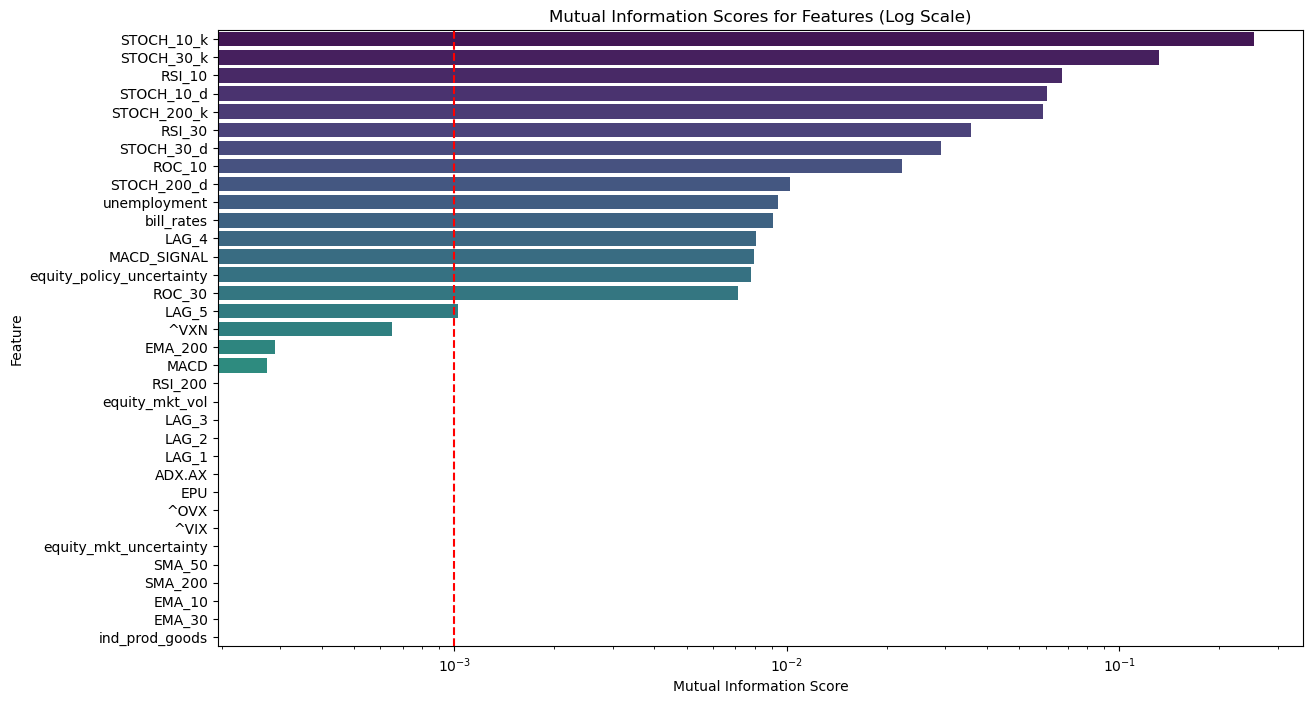

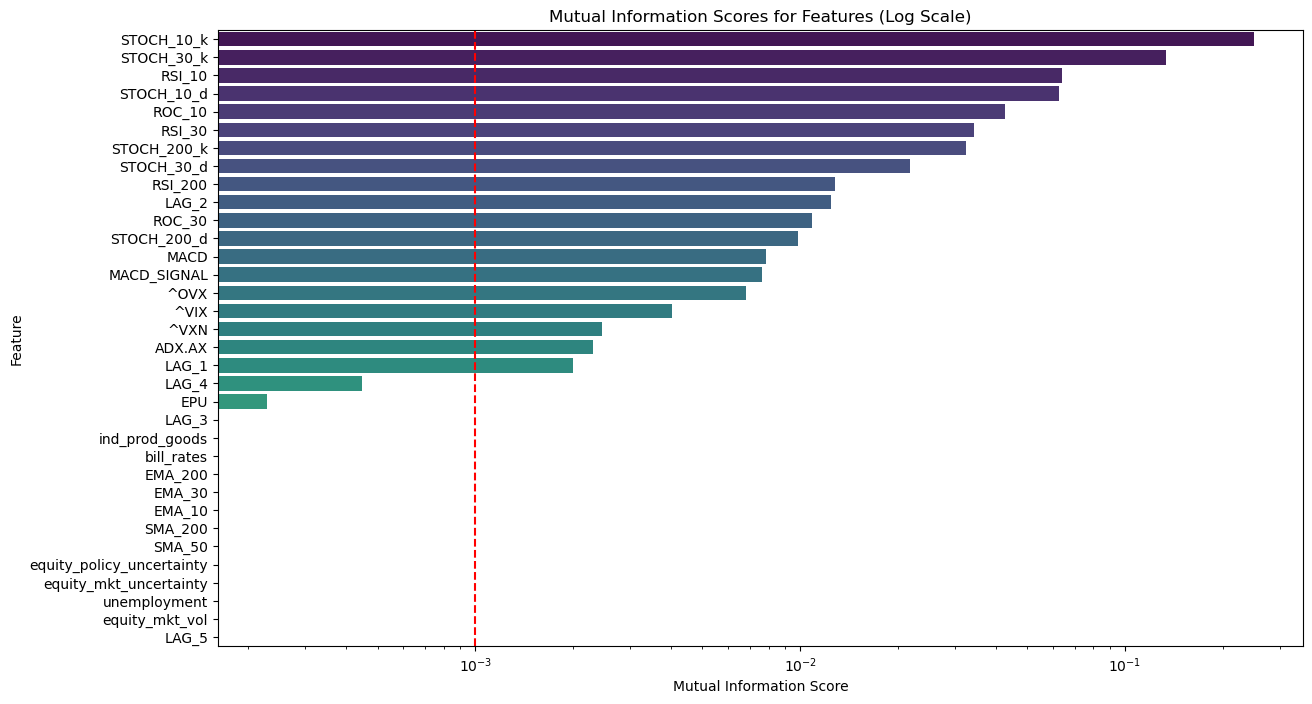

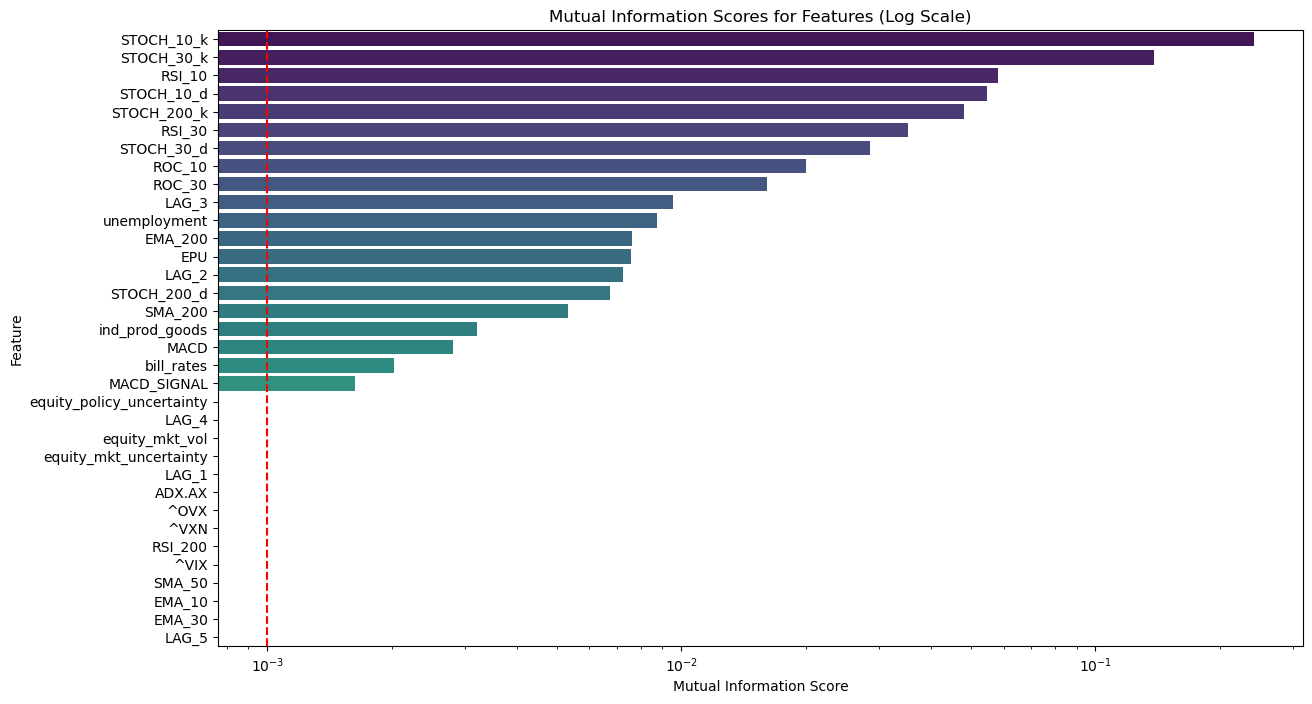

In [32]:
# Visualize the mutual information score of the dataset (logarithmic scale)
mic_df_dba_log = plot_MIC_logscale(X_dba, y_dba)

mic_df_gld_log = plot_MIC_logscale(X_gld, y_gld)

mic_df_uso_log = plot_MIC_logscale(X_uso, y_uso)

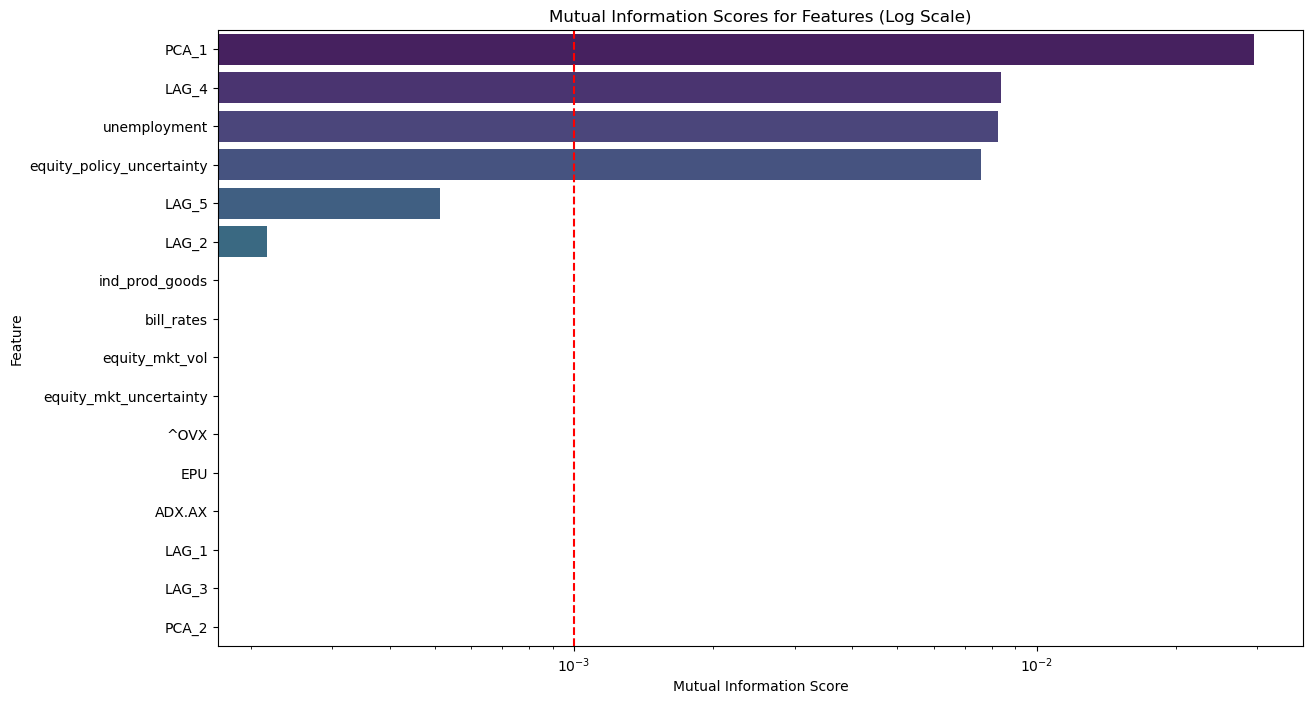

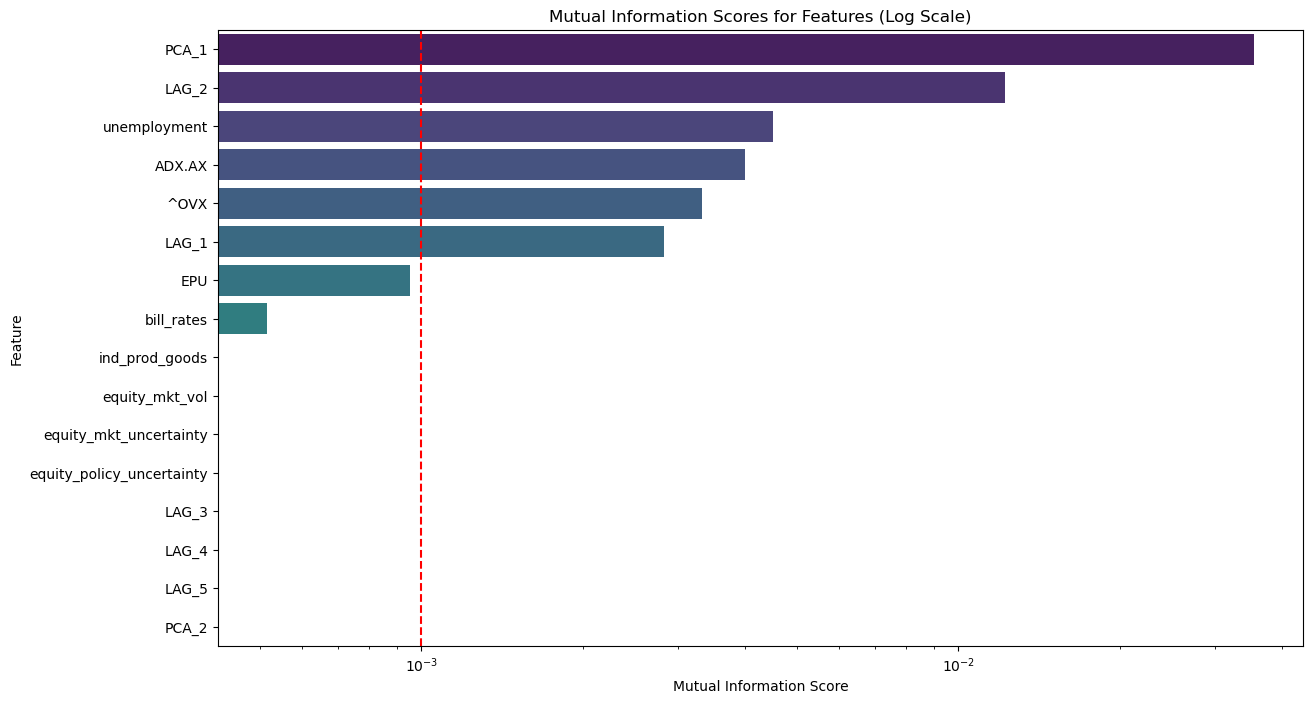

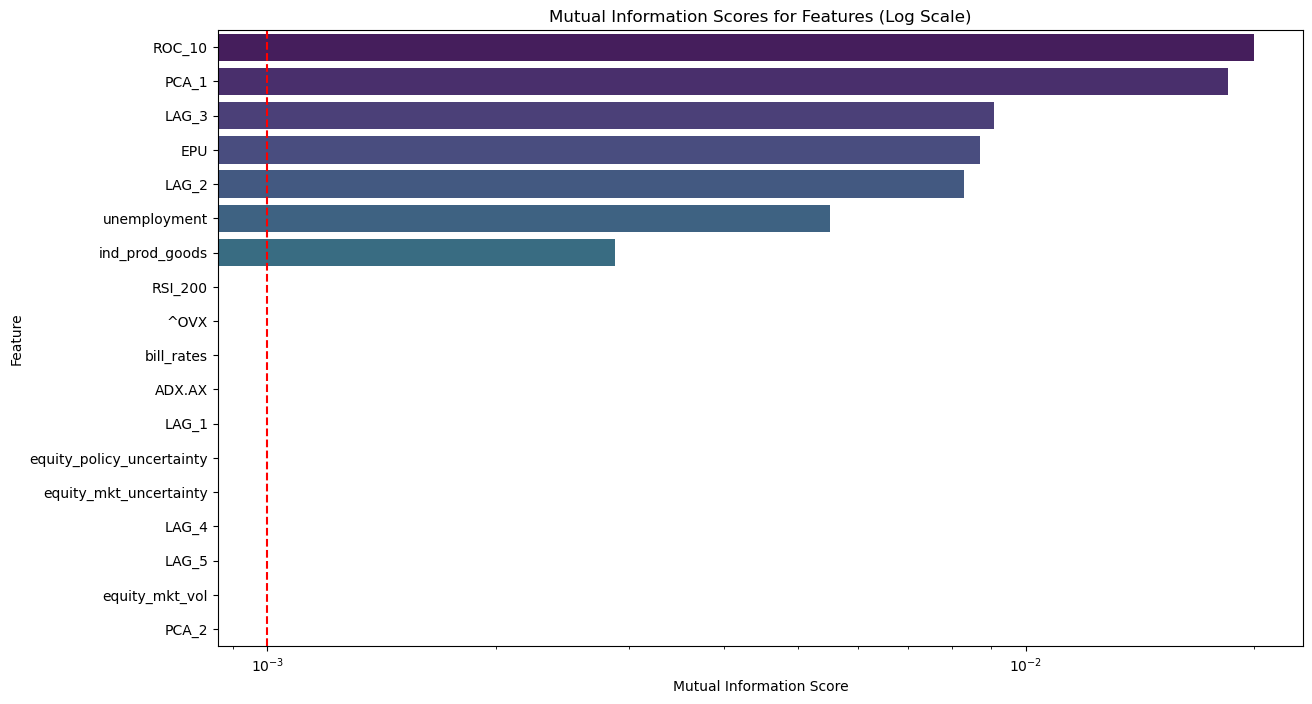

In [33]:
# For our PCA data

mic_df_dba_pca_log = plot_MIC_logscale(X_dba_pca, y_dba_pca)

mic_df_gld_pca_log = plot_MIC_logscale(X_gld_pca, y_gld_pca)

mic_df_uso_pca_log = plot_MIC_logscale(X_uso_pca, y_uso_pca)

## Sample Balanced

In [34]:
y_dba.value_counts()
y_gld.value_counts()
y_uso.value_counts()

0.0    1867
1.0    1727
Name: PnL, dtype: int64

1.0    1877
0.0    1717
Name: PnL, dtype: int64

1.0    1859
0.0    1735
Name: PnL, dtype: int64

Target is balanced, no need to resample

# Machine Learning

## Base Model

In [35]:
import os
import locale
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.utils import parallel_backend

In [36]:
def split_data(X, y, test_size=0.2, val_size=0.4, random_state=42):
    # split to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # split train into train(for base model) and validation(for meta model)
    X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)
    return X_train_base, X_val, X_test, y_train_base, y_val, y_test


In [37]:
# split dataset
X_dba_base, X_dba_val, X_dba_test, y_dba_base, y_dba_val, y_dba_test = split_data(X_dba_MIC, y_dba)

X_gld_base, X_gld_val, X_gld_test, y_gld_base, y_gld_val, y_gld_test = split_data(X_gld_MIC, y_gld)

X_uso_base, X_uso_val, X_uso_test, y_uso_base, y_uso_val, y_uso_test = split_data(X_uso_MIC, y_uso)

print("DBA base set shape:", X_dba_base.shape, y_dba_base.shape)
print("DBA validation set shape:", X_dba_val.shape, y_dba_val.shape)
print("DBA test set shape:", X_dba_test.shape, y_dba_test.shape)

print("GLD base set shape:", X_gld_base.shape, y_gld_base.shape)
print("GLD validation set shape:", X_gld_val.shape, y_gld_val.shape)
print("GLD test set shape:", X_gld_test.shape, y_gld_test.shape)

print("USO base set shape:", X_uso_base.shape, y_uso_base.shape)
print("USO validation set shape:", X_uso_val.shape, y_uso_val.shape)
print("USO test set shape:", X_uso_test.shape, y_uso_test.shape)

DBA base set shape: (1725, 17) (1725,)
DBA validation set shape: (1150, 17) (1150,)
DBA test set shape: (719, 17) (719,)
GLD base set shape: (1725, 19) (1725,)
GLD validation set shape: (1150, 19) (1150,)
GLD test set shape: (719, 19) (719,)
USO base set shape: (1725, 20) (1725,)
USO validation set shape: (1150, 20) (1150,)
USO test set shape: (719, 20) (719,)


In [38]:
X_dba_pca_base, X_dba_pca_val, X_dba_pca_test, y_dba_pca_base, y_dba_pca_val, y_dba_pca_test = split_data(X_dba_pca_MIC, y_dba_pca)

X_gld_pca_base, X_gld_pca_val, X_gld_pca_test, y_gld_pca_base, y_gld_pca_val, y_gld_pca_test = split_data(X_gld_pca_MIC, y_gld_pca)

X_uso_pca_base, X_uso_pca_val, X_uso_pca_test, y_uso_pca_base, y_uso_pca_val, y_uso_pca_test = split_data(X_uso_pca_MIC, y_uso_pca)

print("DBA_PCA base set shape:", X_dba_pca_base.shape, y_dba_pca_base.shape)
print("DBA_PCA validation set shape:", X_dba_pca_val.shape, y_dba_pca_val.shape)
print("DBA_PCA test set shape:", X_dba_pca_test.shape, y_dba_pca_test.shape)

print("GLD_PCA base set shape:", X_gld_pca_base.shape, y_gld_pca_base.shape)
print("GLD_PCA validation set shape:", X_gld_pca_val.shape, y_gld_pca_val.shape)
print("GLD_PCA test set shape:", X_gld_pca_test.shape, y_gld_pca_test.shape)

print("USO_PCA base set shape:", X_uso_pca_base.shape, y_uso_pca_base.shape)
print("USO_PCA validation set shape:", X_uso_pca_val.shape, y_uso_pca_val.shape)
print("USO_PCA test set shape:", X_uso_pca_test.shape, y_uso_pca_test.shape)

DBA_PCA base set shape: (1725, 7) (1725,)
DBA_PCA validation set shape: (1150, 7) (1150,)
DBA_PCA test set shape: (719, 7) (719,)
GLD_PCA base set shape: (1725, 4) (1725,)
GLD_PCA validation set shape: (1150, 4) (1150,)
GLD_PCA test set shape: (719, 4) (719,)
USO_PCA base set shape: (1725, 9) (1725,)
USO_PCA validation set shape: (1150, 9) (1150,)
USO_PCA test set shape: (719, 9) (719,)


In [39]:
os.environ['LANG'] = 'en_US.UTF-8'
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# set random seed
SEED = 42
np.random.seed(SEED)

# Define the model and hyperparameter search space
model_params = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'ExtraTrees': (ExtraTreesClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': Integer(10, 200),
        'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'SVM': (SVC(probability=True), {
        'C': Real(1e-3, 1e+3, prior='log-uniform'),  # 缩小搜索范围
        'gamma': Real(1e-4, 1e+1, prior='log-uniform'),  # 缩小搜索范围
        'kernel': Categorical(['linear', 'rbf'])
    }),
    'NaiveBayes': (GaussianNB(), {
        'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')
    })
}


'en_US.UTF-8'

In [40]:
# # Test Params


# os.environ['LANG'] = 'en_US.UTF-8'
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# SEED = 42
# np.random.seed(SEED)

# model_params = {
#     'RandomForest': (RandomForestClassifier(), {
#         'max_depth': Integer(1,10)
#     }),
#     'ExtraTrees': (ExtraTreesClassifier(), {
#         'max_depth': Integer(1,10)
#     }),
#     'GradientBoosting': (GradientBoostingClassifier(), {
#         'max_depth': Integer(1,10)
#     }),
#     'SVM': (SVC(probability=True), {
#         'kernel': Categorical(['linear'])
#     }),
#     'NaiveBayes': (GaussianNB(), {
#         'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')
#     })
# }


In [41]:
# Defining functions: hyperparameter optimization and model evaluation
def optimize_and_evaluate(model, param_dist, X_train, y_train, X_val, y_val):
    opt = BayesSearchCV(model, search_spaces=param_dist, n_iter=30, cv=3, n_jobs=-1, random_state=SEED, scoring='accuracy')
    
    with parallel_backend('threading'):
        opt.fit(X_train, y_train)
    
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    return {
        'model': best_model,
        'accuracy': accuracy,
        'f1': f1,
        'kappa': kappa,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

def process_and_evaluate(datasets, model_params):
    results = {dataset: {} for dataset in datasets}
    
    for dataset_name, (X_train, y_train, X_val, y_val) in datasets.items():
        print(f"Processing {dataset_name} dataset...")
        for model_name, (model, param_dist) in model_params.items():
            print(f"Optimizing {model_name} for {dataset_name} dataset...")
            result = optimize_and_evaluate(model, param_dist, X_train, y_train, X_val, y_val)
            results[dataset_name][model_name] = result
    return results

def visualize_results(results):
    for dataset_name, dataset_results in results.items():
        accuracies = [metrics['accuracy'] for model, metrics in dataset_results.items()]
        f1_scores = [metrics['f1'] for model, metrics in dataset_results.items()]
        kappas = [metrics['kappa'] for model, metrics in dataset_results.items()]

        bar_width = 0.25
        r1 = np.arange(len(dataset_results))
        r2 = [x + bar_width for x in r1]
        r3 = [x + bar_width for x in r2]

        plt.figure(figsize=(14, 8))
        plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
        plt.bar(r2, f1_scores, color='g', width=bar_width, edgecolor='grey', label='F1 Score')
        plt.bar(r3, kappas, color='r', width=bar_width, edgecolor='grey', label='Kappa')
        
        plt.xlabel('Model', fontweight='bold')
        plt.xticks([r + bar_width for r in range(len(dataset_results))], dataset_results.keys())
        plt.title(f'{dataset_name} Dataset Model Performance')
        plt.legend()
        plt.show()

Processing DBA dataset...
Optimizing RandomForest for DBA dataset...
Optimizing ExtraTrees for DBA dataset...
Optimizing GradientBoosting for DBA dataset...
Optimizing SVM for DBA dataset...
Optimizing NaiveBayes for DBA dataset...
Processing GLD dataset...
Optimizing RandomForest for GLD dataset...
Optimizing ExtraTrees for GLD dataset...
Optimizing GradientBoosting for GLD dataset...
Optimizing SVM for GLD dataset...
Optimizing NaiveBayes for GLD dataset...
Processing USO dataset...
Optimizing RandomForest for USO dataset...
Optimizing ExtraTrees for USO dataset...
Optimizing GradientBoosting for USO dataset...
Optimizing SVM for USO dataset...
Optimizing NaiveBayes for USO dataset...


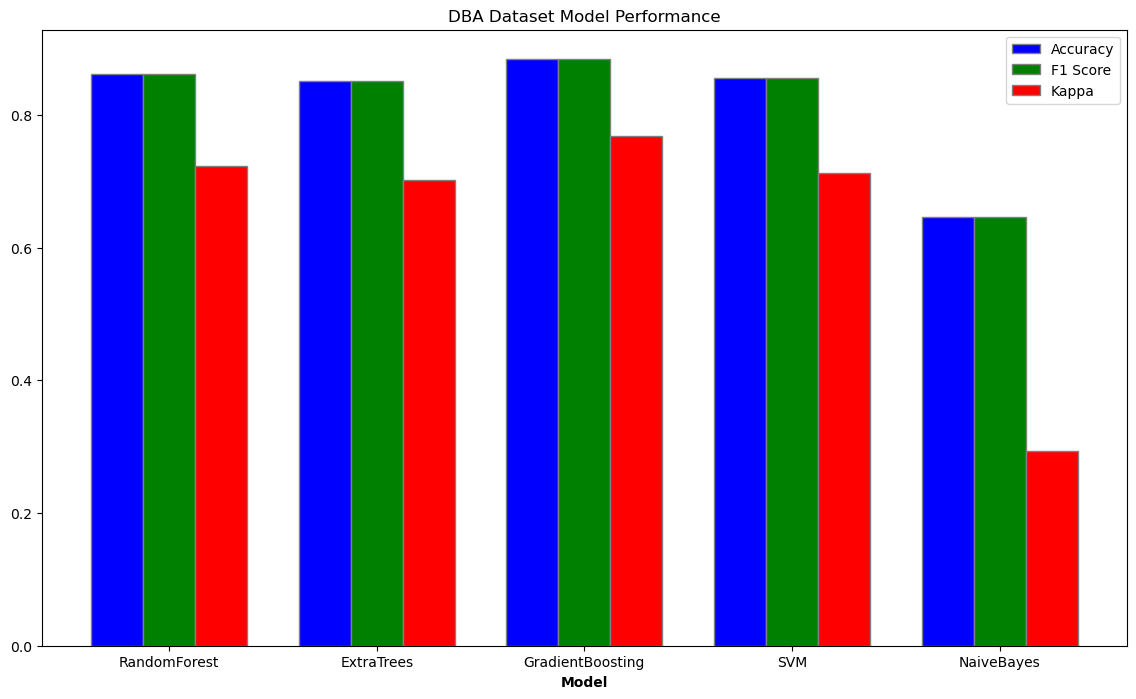

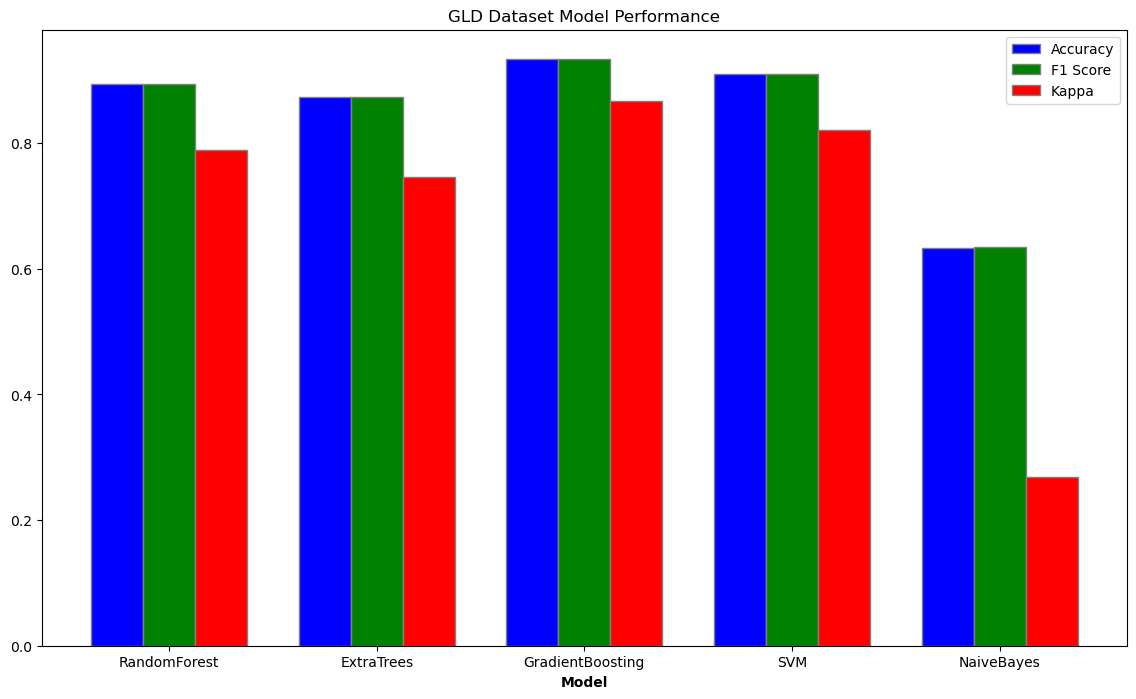

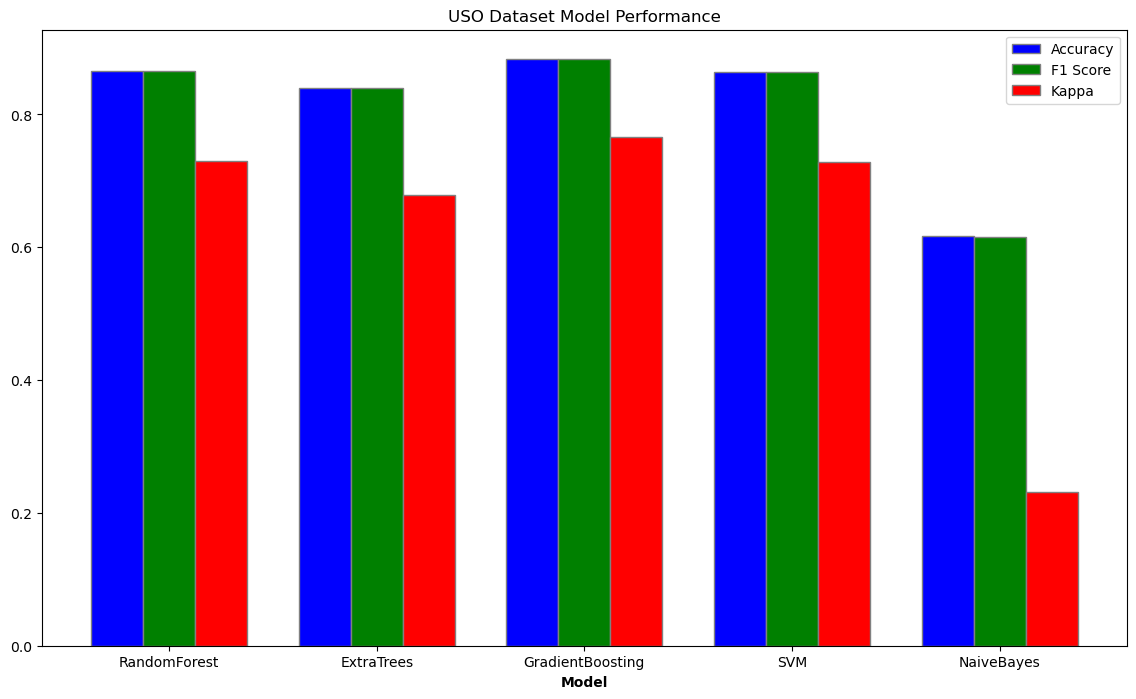

DBA Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.8617
F1: 0.8617
Kappa: 0.7234
Precision: 0.8617
Recall: 0.8617
Confusion Matrix:
[[507  77]
 [ 82 484]]

EXTRATREES Model:
Accuracy: 0.8513
F1: 0.8513
Kappa: 0.7025
Precision: 0.8513
Recall: 0.8513
Confusion Matrix:
[[500  84]
 [ 87 479]]

GRADIENTBOOSTING Model:
Accuracy: 0.8843
F1: 0.8843
Kappa: 0.7686
Precision: 0.8845
Recall: 0.8843
Confusion Matrix:
[[523  61]
 [ 72 494]]

SVM Model:
Accuracy: 0.8565
F1: 0.8565
Kappa: 0.7130
Precision: 0.8566
Recall: 0.8565
Confusion Matrix:
[[499  85]
 [ 80 486]]

NAIVEBAYES Model:
Accuracy: 0.6470
F1: 0.6469
Kappa: 0.2936
Precision: 0.6469
Recall: 0.6470
Confusion Matrix:
[[385 199]
 [207 359]]
GLD Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.8948
F1: 0.8948
Kappa: 0.7892
Precision: 0.8948
Recall: 0.8948
Confusion Matrix:
[[491  62]
 [ 59 538]]

EXTRATREES Model:
Accuracy: 0.8730
F1: 0.8730
Kappa: 0.7454
Precision: 0.8732
Recall: 0.8730
Confusion Matrix:

In [42]:
datasets = {
    'DBA': (X_dba_base, y_dba_base, X_dba_val, y_dba_val),
    'GLD': (X_gld_base, y_gld_base, X_gld_val, y_gld_val),
    'USO': (X_uso_base, y_uso_base, X_uso_val, y_uso_val)
}


# Store the best model parameters into dict: result
results = process_and_evaluate(datasets, model_params)

visualize_results(results)

for dataset_name, dataset_results in results.items():
    print(f"{dataset_name} Dataset Model Evaluation Results:")
    for model_name, metrics in dataset_results.items():
        print(f"\n{model_name.upper()} Model:")
        for metric, value in metrics.items():
            if metric == 'confusion_matrix':
                print(f"{metric.replace('_', ' ').title()}:\n{value}")
            elif metric == 'model':
                continue
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

Processing DBA dataset...
Optimizing RandomForest for DBA dataset...
Optimizing ExtraTrees for DBA dataset...
Optimizing GradientBoosting for DBA dataset...
Optimizing SVM for DBA dataset...
Optimizing NaiveBayes for DBA dataset...
Processing GLD dataset...
Optimizing RandomForest for GLD dataset...
Optimizing ExtraTrees for GLD dataset...
Optimizing GradientBoosting for GLD dataset...
Optimizing SVM for GLD dataset...
Optimizing NaiveBayes for GLD dataset...
Processing USO dataset...
Optimizing RandomForest for USO dataset...
Optimizing ExtraTrees for USO dataset...
Optimizing GradientBoosting for USO dataset...
Optimizing SVM for USO dataset...
Optimizing NaiveBayes for USO dataset...


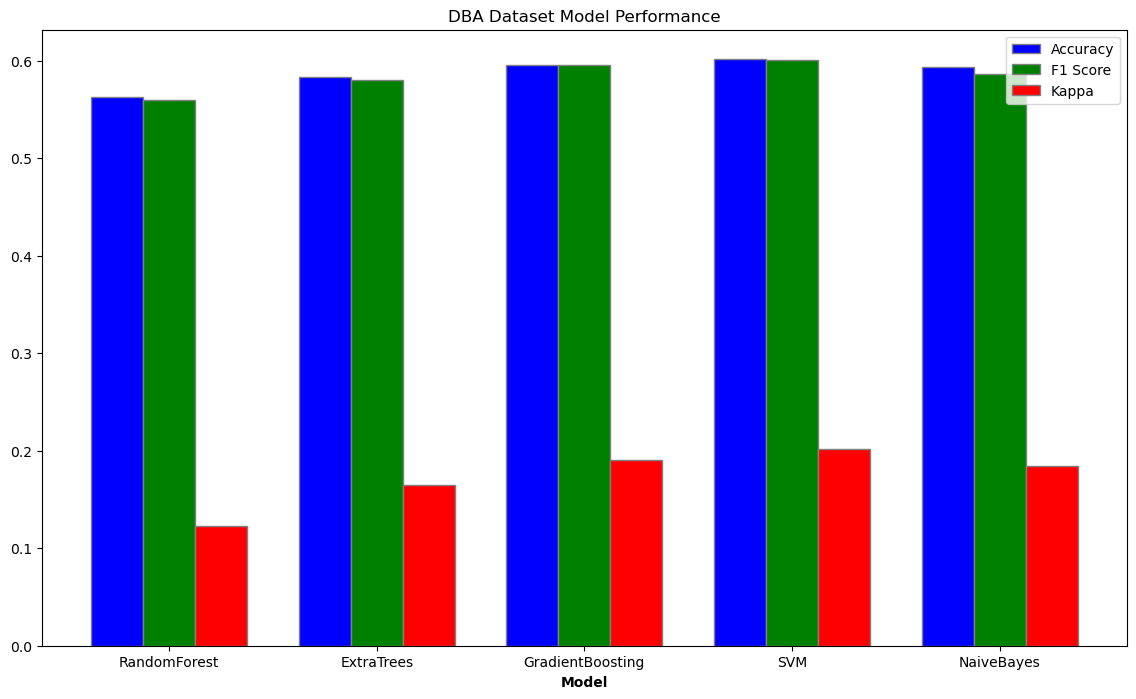

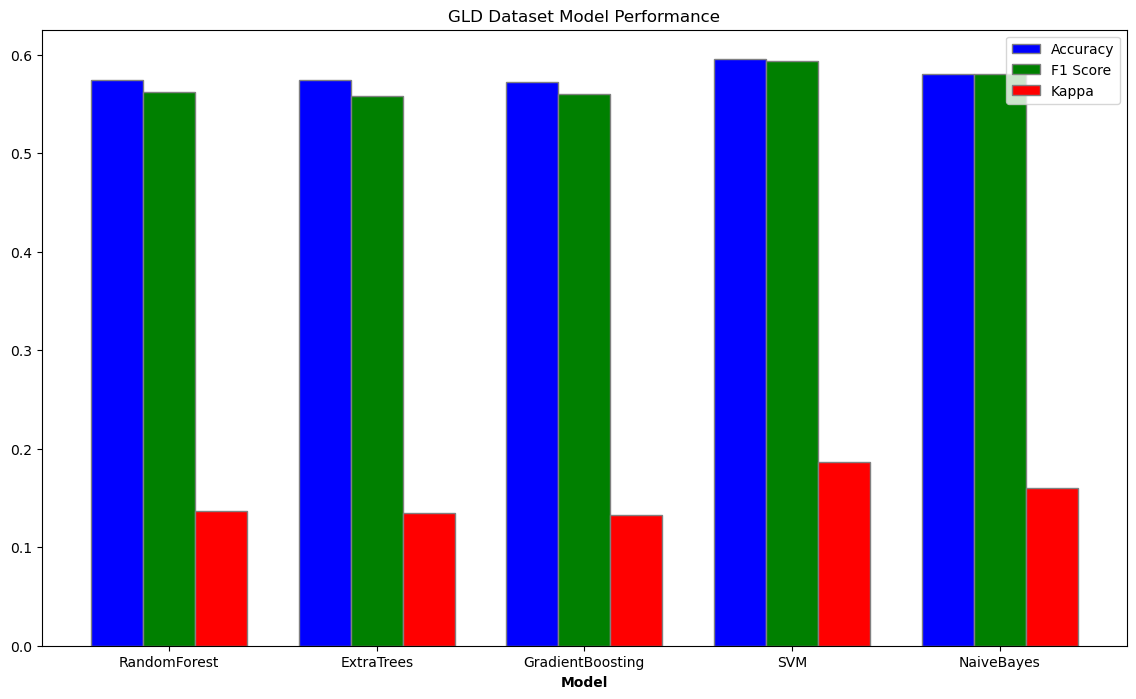

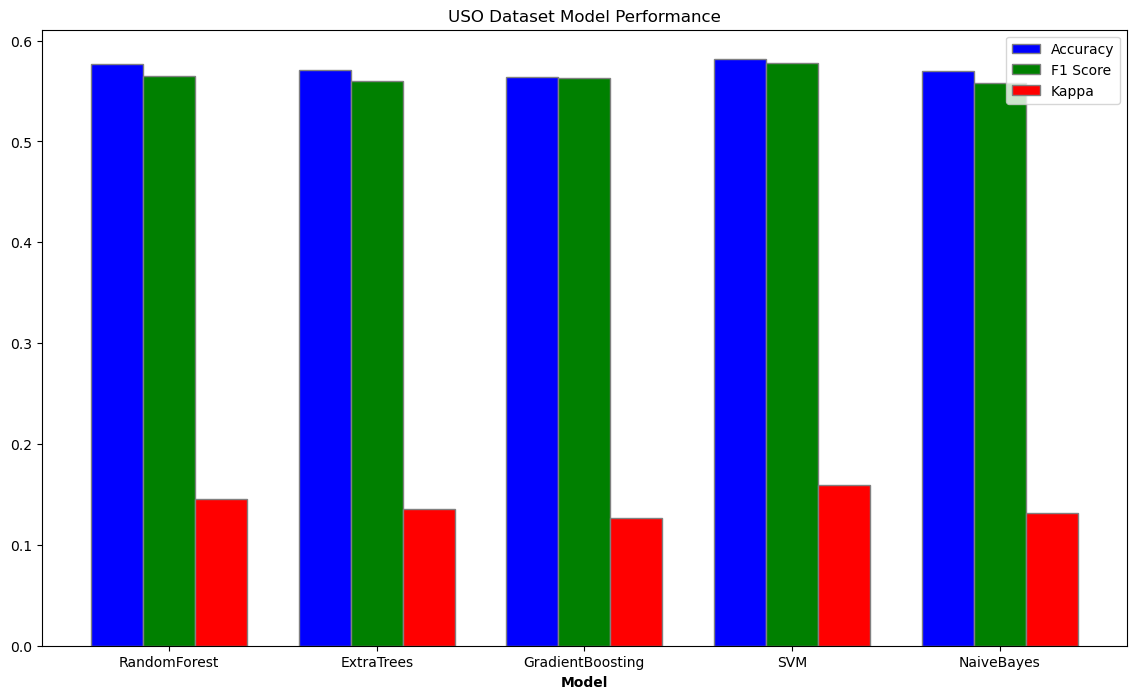

DBA Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.5626
F1: 0.5601
Kappa: 0.1231
Precision: 0.5629
Recall: 0.5626
Confusion Matrix:
[[372 212]
 [291 275]]

EXTRATREES Model:
Accuracy: 0.5835
F1: 0.5803
Kappa: 0.1647
Precision: 0.5846
Recall: 0.5835
Confusion Matrix:
[[390 194]
 [285 281]]

GRADIENTBOOSTING Model:
Accuracy: 0.5957
F1: 0.5954
Kappa: 0.1907
Precision: 0.5955
Recall: 0.5957
Confusion Matrix:
[[361 223]
 [242 324]]

SVM Model:
Accuracy: 0.6017
F1: 0.6006
Kappa: 0.2021
Precision: 0.6021
Recall: 0.6017
Confusion Matrix:
[[382 202]
 [256 310]]

NAIVEBAYES Model:
Accuracy: 0.5939
F1: 0.5865
Kappa: 0.1844
Precision: 0.5986
Recall: 0.5939
Confusion Matrix:
[[423 161]
 [306 260]]
GLD Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.5739
F1: 0.5618
Kappa: 0.1368
Precision: 0.5758
Recall: 0.5739
Confusion Matrix:
[[223 330]
 [160 437]]

EXTRATREES Model:
Accuracy: 0.5739
F1: 0.5578
Kappa: 0.1352
Precision: 0.5776
Recall: 0.5739
Confusion Matrix:

In [43]:
datasets_pca = {
    'DBA': (X_dba_pca_base, y_dba_pca_base, X_dba_pca_val, y_dba_pca_val),
    'GLD': (X_gld_pca_base, y_gld_pca_base, X_gld_pca_val, y_gld_pca_val),
    'USO': (X_uso_pca_base, y_uso_pca_base, X_uso_pca_val, y_uso_pca_val)
}

results_pca = process_and_evaluate(datasets_pca, model_params)

visualize_results(results_pca)

for dataset_name, dataset_results in results_pca.items():
    print(f"{dataset_name} Dataset Model Evaluation Results:")
    for model_name, metrics in dataset_results.items():
        print(f"\n{model_name.upper()} Model:")
        for metric, value in metrics.items():
            if metric == 'confusion_matrix':
                print(f"{metric.replace('_', ' ').title()}:\n{value}")
            elif metric == 'model':
                continue
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

> PCA is not good for our model training.
>
> We will not use it.

In [54]:
from pprint import pprint

def get_best_models(results):
    models = {}
    for dataset, model_info in results.items():
        models[dataset] = {model_name: metrics['model'] for model_name, metrics in model_info.items()}
    return models

pprint(get_best_models(results))

{'DBA': {'ExtraTrees': ExtraTreesClassifier(max_depth=17, n_estimators=197),
         'GradientBoosting': GradientBoostingClassifier(learning_rate=1.0, max_depth=10, min_samples_split=9,
                           n_estimators=183),
         'NaiveBayes': GaussianNB(var_smoothing=2.888176653914472e-10),
         'RandomForest': RandomForestClassifier(max_depth=16, min_samples_split=6, n_estimators=110),
         'SVM': SVC(C=9.823308694508999, gamma=10.0, kernel='linear', probability=True)},
 'GLD': {'ExtraTrees': ExtraTreesClassifier(max_depth=20, min_samples_split=10, n_estimators=200),
         'GradientBoosting': GradientBoostingClassifier(learning_rate=1.0, max_depth=7, min_samples_split=10,
                           n_estimators=200),
         'NaiveBayes': GaussianNB(var_smoothing=2.888176653914472e-10),
         'RandomForest': RandomForestClassifier(max_depth=16, min_samples_split=6, n_estimators=110),
         'SVM': SVC(C=105.76211650904162, gamma=2.6096146808538574, kernel

## Meta Model

In [55]:
from sklearn.base import clone

# store out best base model and predict for val dataset
def train_base_models(base_models, X_train, y_train):
    trained_models = {}
    for model_name, model in base_models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

def predict_with_models(trained_models, X_val):
    base_predictions = []
    for model_name, model in trained_models.items():
        y_val_pred = model.predict_proba(X_val)[:, 1]  # Assuming a binary classification task
        base_predictions.append(y_val_pred)
    X_meta = np.column_stack(base_predictions)
    return X_meta

def evaluate_model(y_true, y_pred):
    results = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),  # 添加 f1
        'kappa': cohen_kappa_score(y_true, y_pred)  # 添加 kappa
    }
    return results


# train our stacking model and evaluate
def train_and_evaluate_stacking(base_models, X_train, y_train, X_val, y_val, X_test, y_test, search_spaces, random_state=42):
    trained_models = train_base_models(base_models, X_train, y_train)
    X_meta_train = predict_with_models(trained_models, X_val)
    
    meta_model = AdaBoostClassifier(random_state=random_state)
    opt = BayesSearchCV(meta_model, search_spaces, n_iter=30, cv=3, n_jobs=-1, random_state=random_state, scoring='accuracy')
    
    with parallel_backend('threading'):
        opt.fit(X_meta_train, y_val)
    
    best_meta_model = opt.best_estimator_
    
    X_meta_test = predict_with_models(trained_models, X_test)
    y_test_pred = best_meta_model.predict(X_meta_test)
    
    evaluation_results = evaluate_model(y_test, y_test_pred)
    evaluation_results['meta_model'] = best_meta_model  # Save the meta-model if needed later
    return evaluation_results, trained_models, best_meta_model,y_test_pred

# def predict_with_stacking_model(base_models, meta_model, X):
#     X_meta = predict_with_models(base_models, X)
#     return meta_model.predict(X_meta)

In [56]:
# extract our best base model from dict: result
base_models_dba = {model_name: clone(result['model']) for model_name, result in results['DBA'].items()}
base_models_gld = {model_name: clone(result['model']) for model_name, result in results['GLD'].items()}
base_models_uso = {model_name: clone(result['model']) for model_name, result in results['USO'].items()}

# Define the hyperparameter search space for the meta model
search_spaces = {
    'n_estimators': Integer(50, 200),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform')
}

# train our stacking model and evaluate
stacking_results_dba, trained_base_models_dba, best_meta_model_dba,y_dba_pred = train_and_evaluate_stacking(
    base_models_dba, X_dba_base, y_dba_base, X_dba_val, y_dba_val, X_dba_test, y_dba_test,search_spaces
)
stacking_results_gld, trained_base_models_gld, best_meta_model_gld,y_gld_pred = train_and_evaluate_stacking(
    base_models_gld, X_gld_base, y_gld_base, X_gld_val, y_gld_val, X_gld_test, y_gld_test, search_spaces
)
stacking_results_uso, trained_base_models_uso, best_meta_model_uso,y_uso_pred = train_and_evaluate_stacking(
    base_models_uso, X_uso_base, y_uso_base, X_uso_val, y_uso_val, X_uso_test, y_uso_test, search_spaces
)

In [68]:
def print_evaluation_results(stacking_results, dataset_name):
    print("\n")
    print(f"{dataset_name} Dataset Stacking Model Evaluation Results:")
    for metric, value in stacking_results.items():
        if metric == 'meta_model':
            continue
        print("\t"f"{metric.replace('_', ' ').title()}: {value:.4f}")    

print_evaluation_results(stacking_results_dba, "DBA")
print_evaluation_results(stacking_results_gld, "GLD")
print_evaluation_results(stacking_results_uso, "USO")



DBA Dataset Stacking Model Evaluation Results:
	Accuracy: 0.8887
	Precision: 0.9021
	Recall: 0.8661
	F1: 0.8837
	Kappa: 0.7771


GLD Dataset Stacking Model Evaluation Results:
	Accuracy: 0.9583
	Precision: 0.9699
	Recall: 0.9492
	F1: 0.9595
	Kappa: 0.9165


USO Dataset Stacking Model Evaluation Results:
	Accuracy: 0.8860
	Precision: 0.9167
	Recall: 0.8575
	F1: 0.8861
	Kappa: 0.7722


In [83]:
pprint(best_meta_model_dba)
pprint(best_meta_model_gld)
pprint(best_meta_model_uso)

AdaBoostClassifier(learning_rate=0.031749652684437815, n_estimators=138,
                   random_state=42)
AdaBoostClassifier(learning_rate=0.07756486208064789, n_estimators=188,
                   random_state=42)
AdaBoostClassifier(learning_rate=0.069203967546054, n_estimators=200,
                   random_state=42)


In [69]:
# # predict for new data
# X_new = np.random.rand(10, X_dba_base.shape[1])  # 假设X_new是新的数据
# y_pred_dba = predict_with_stacking_model(trained_base_models_dba, best_meta_model_dba, X_new)
# y_pred_gld = predict_with_stacking_model(trained_base_models_gld, best_meta_model_gld, X_new)
# y_pred_uso = predict_with_stacking_model(trained_base_models_uso, best_meta_model_uso, X_new)
# 
# print("Predictions for new data (DBA):", y_pred_dba)
# print("Predictions for new data (GLD):", y_pred_gld)
# print("Predictions for new data (USO):", y_pred_uso)

## Plotting

In [70]:
def extract_base_metrics(results, dataset_name, metrics):
    base_model_names = list(results[dataset_name].keys())
    base_metrics = {metric: [results[dataset_name][model][metric] for model in base_model_names] for metric in metrics}
    return base_metrics, base_model_names

def extract_stacking_metrics(stacking_results, metrics):
    stack_metrics = {metric: stacking_results[metric] for metric in metrics}
    return stack_metrics

def plot_metrics(ax, base_model_names, base_metrics, stack_metrics, metric_name):
    ax.plot(base_model_names, base_metrics[metric_name], label='Base Models', marker='o')
    ax.axhline(y=stack_metrics[metric_name], color='r', linestyle='-', label='Stacking Model')
    ax.set_title(f'{metric_name.capitalize()} Score')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.legend()

def visualize_results(results, stacking_results, datasets):
    metrics = ['accuracy', 'f1', 'kappa']
    
    for dataset_name in datasets:
        base_metrics, base_model_names = extract_base_metrics(results, dataset_name, metrics)
        stack_metrics = extract_stacking_metrics(stacking_results[dataset_name], metrics)
        
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        for i, metric in enumerate(metrics):
            plot_metrics(axs[i], base_model_names, base_metrics, stack_metrics, metric)
        
        fig.suptitle(f'{dataset_name} Dataset Performance Comparison')
        plt.show()

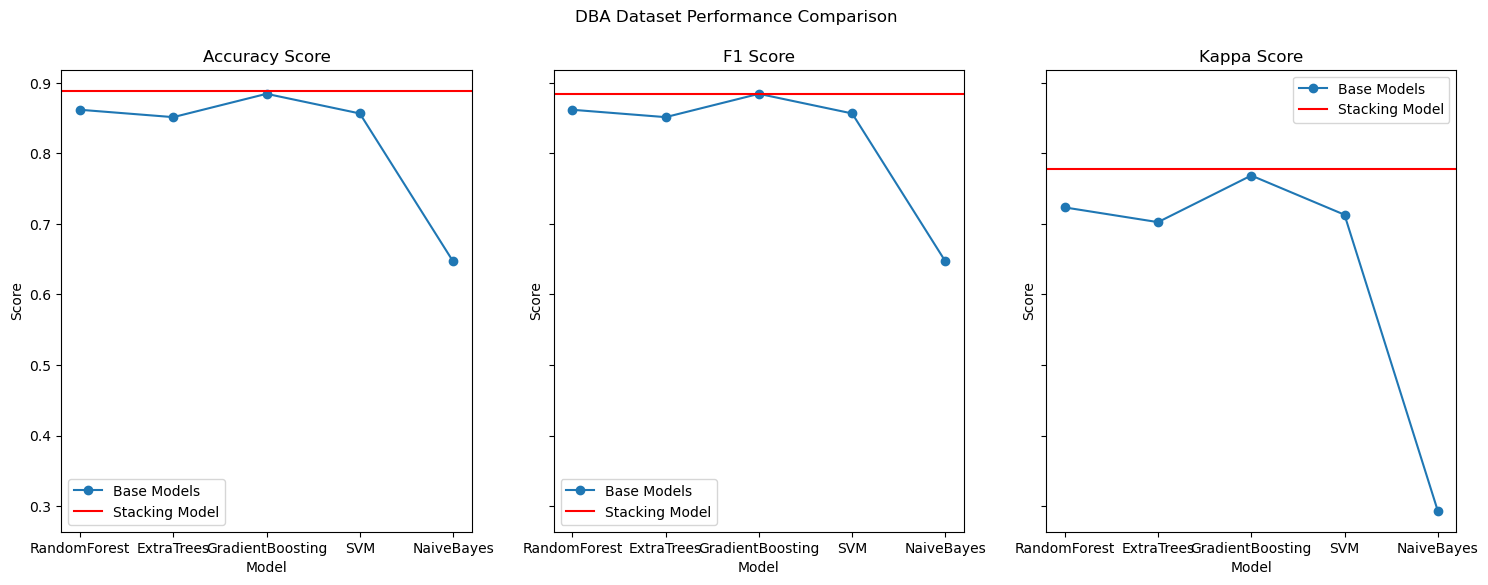

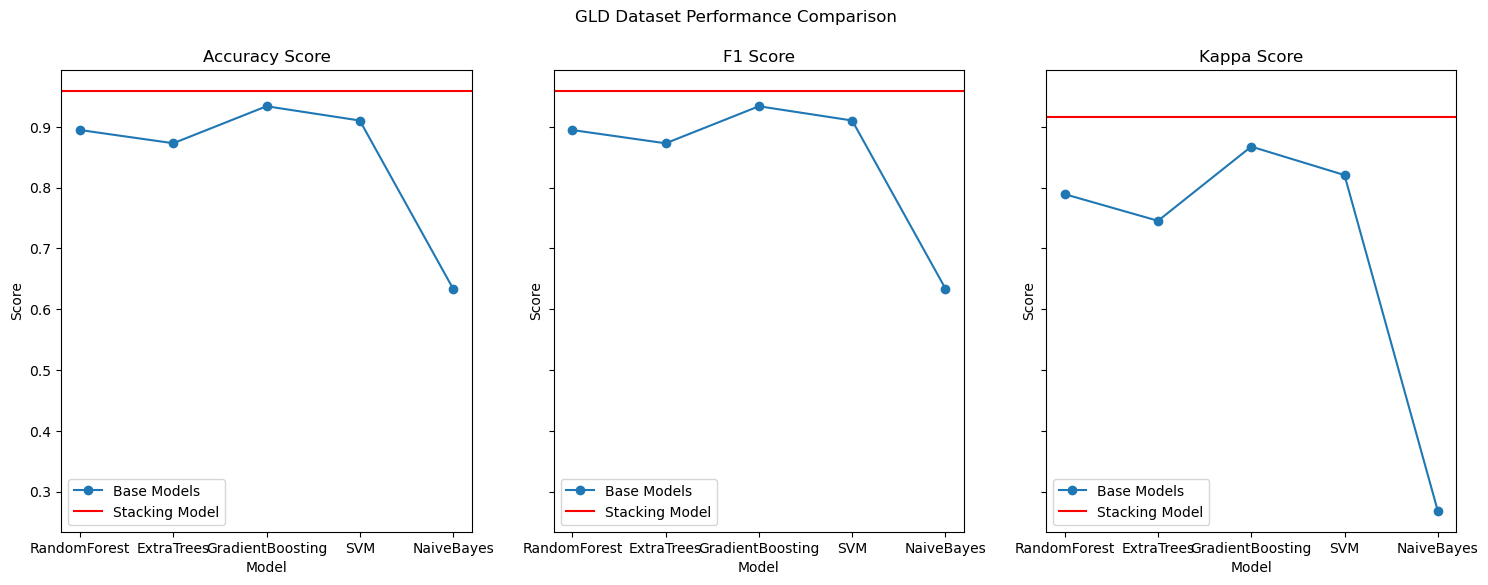

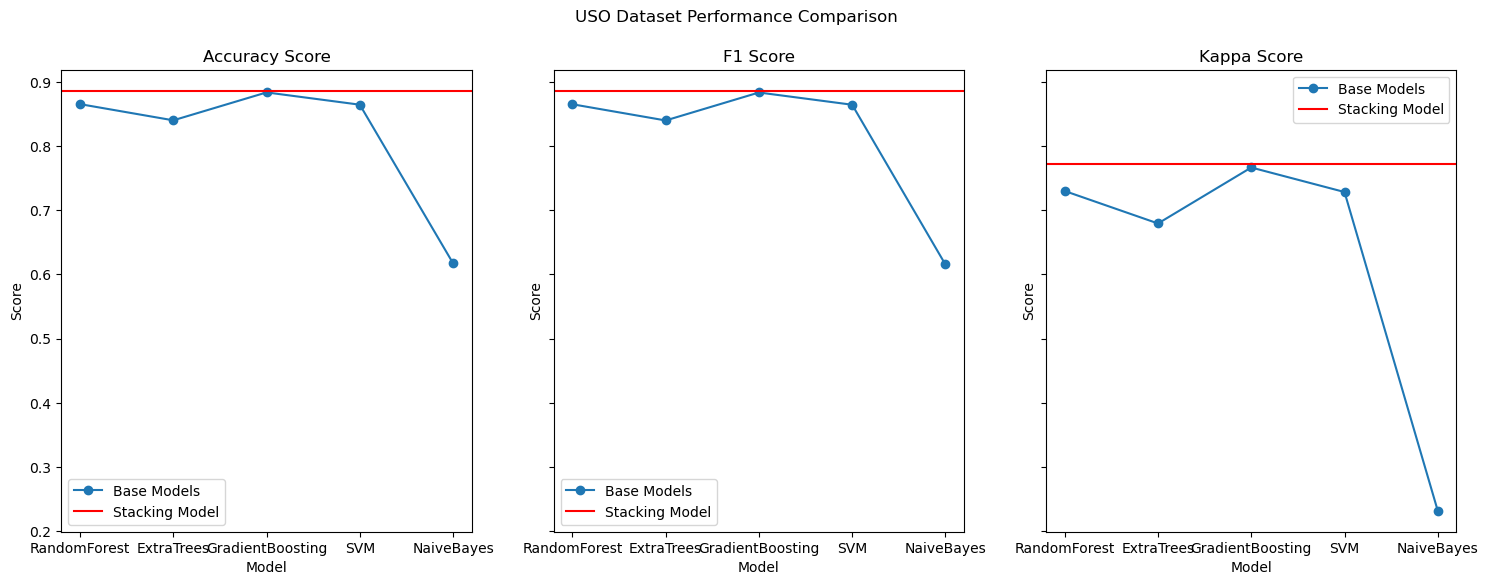

In [71]:
visualize_results(results, {
    'DBA': stacking_results_dba,
    'GLD': stacking_results_gld,
    'USO': stacking_results_uso
}, datasets)

# Build Portfolio

In [72]:
df = pd.DataFrame({
    'DBA': y_dba_test,
    'GLD': y_gld_test,
    'OIL': y_uso_test
})

print(df)

# df.to_csv('MyDataFrame.csv', index=False)

      DBA  GLD  OIL
2834  1.0  0.0  0.0
315   0.0  0.0  1.0
3538  1.0  1.0  1.0
3541  1.0  0.0  0.0
439   0.0  1.0  1.0
...   ...  ...  ...
288   1.0  0.0  0.0
3322  0.0  1.0  0.0
2378  1.0  0.0  1.0
2722  0.0  1.0  0.0
2232  0.0  1.0  1.0

[719 rows x 3 columns]


In [73]:
y_dba_test

2834    1.0
315     0.0
3538    1.0
3541    1.0
439     0.0
       ... 
288     1.0
3322    0.0
2378    1.0
2722    0.0
2232    0.0
Name: PnL, Length: 719, dtype: float64

In [74]:
len(y_dba_pred)

719

In [75]:
y_dba_pred[0]

1.0

In [76]:
dba_with_indicators#["returns"]

ind_prod_goods  bill_rates  equity_mkt_vol  unemployment  \
0          -1.898805   -0.508114       -0.327303      1.512996   
1          -1.879463   -0.508114       -0.496148      1.512996   
2          -1.860121   -0.514812       -0.496148      1.512996   
3          -1.840778   -0.521510       -0.405232      1.512996   
4          -1.821436   -0.514812       -0.496148      1.512996   
...              ...         ...             ...           ...   
3589        0.916651    2.881196        6.312186     -0.960475   
3590        0.936385    2.874497       -0.418220     -0.961975   
3591        0.956119    2.867799       -0.371463     -0.963475   
3592        0.975852    2.874497       -0.184435     -0.964975   
3593        0.995586    2.861101       -0.203917     -0.966475   

      equity_mkt_uncertainty  equity_policy_uncertainty   ETF_DBA    SMA_50  \
0                   0.688927                  -0.146810  0.667393  0.802963   
1                  -0.544328                  -0.441826  0.750945  0.808878   
2                  -0.582900                  -0.344590  0.723791  0.813871   
3                  -0.527496                  -0.610188  0.755123  0.820290   
4                   0.803942                   0.236699  0.713347  0.826164   
...                      ...                        ...       ...       ...   
3589               -0.581263                   0.537504  0.350382  0.100263   
3590                1.664217                  -0.057726  0.363902  0.107819   
3591                0.886580                   0.247096  0.303063  0.113374   
3592               -0.068488                  -0.193951  0.305316  0.118715   
3593               -0.624979                  -0.752438  0.309823  0.124055   

       SMA_200    EMA_10  ...      ^VXN       EPU    ADX.AX   returns  \
0     0.687062  0.858361  ...  1.383680 -2.436824  2.567219 -0.013163   
1     0.679168  0.838890  ...  1.283348 -2.429137  2.333688  0.015468   
2     0.671252  0.818015  ...  1.052026 -2.347635  2.216922 -0.005001   
3     0.664495  0.806640  ...  0.803983 -2.233843  2.450452  0.005768   
4     0.657472  0.789726  ...  0.703651 -2.241531  2.567219 -0.007698   
...        ...       ...  ...       ...       ...       ...       ...   
3589 -0.015767  0.276212  ... -0.508697  1.655244 -0.441949  0.009879   
3590 -0.012995  0.292104  ... -0.543534  1.679888 -0.418289  0.002677   
3591 -0.010613  0.294027  ... -0.504516  1.583552 -0.465610 -0.012105   
3592 -0.007943  0.296011  ... -0.595094  1.679888 -0.465610  0.000451   
3593 -0.005305  0.298455  ... -0.596487  1.749340 -0.453780  0.000901   

         LAG_1     LAG_2     LAG_3     LAG_4     LAG_5  PnL  
0    -1.296863 -0.702954  0.538072 -0.260564 -4.030414  0.0  
1    -1.538924 -1.290141 -0.703622  0.534655 -0.257807  1.0  
2     1.807538 -1.532159 -1.291406 -0.702395  0.537753  0.0  
3    -0.584915  1.813696 -1.533670 -1.287981 -0.699827  1.0  
4     0.673788 -0.578323  1.815590 -1.529339 -1.285664  0.0  
...        ...       ...       ...       ...       ...  ...  
3589  0.369390 -0.310889  0.801011  1.658555 -0.582201  1.0  
3590  1.154241  0.375810 -0.311158  0.796611  1.662135  1.0  
3591  0.312541  1.160518  0.376240 -0.311399  0.799821  0.0  
3592 -1.415248  0.318970  1.161747  0.373428 -0.308663  1.0  
3593  0.052310 -1.408505  0.319343  1.155997  0.376457  1.0  

[3594 rows x 37 columns]

In [77]:
def return_obtain(y_dba_test,y_dba_pred,dba_with_indicators):
    list_return =[]
    for i in range(len(y_dba_pred)):
        indexs = y_dba_test.index[i]  # 获取正确的索引
        if y_dba_pred[i] == y_dba_test.iloc[i]:  # 使用 .iloc 确保按位置访问
            list_return.append(abs(dba_with_indicators.loc[indexs, "returns"]))
        elif y_dba_pred[i] != y_dba_test.iloc[i]:
            list_return.append(-abs(dba_with_indicators.loc[indexs, "returns"]))
    return list_return

In [78]:
list_return_dba = return_obtain(y_dba_test,y_dba_pred,dba_with_indicators)
list_return_gld = return_obtain(y_gld_test,y_gld_pred,gld_with_indicators)
list_return_uso = return_obtain(y_uso_test,y_uso_pred,uso_with_indicators)

In [79]:
df_return = pd.DataFrame({
    'DBA': list_return_dba,
    'GLD': list_return_gld,
    'USO': list_return_uso
})

df_return

DBA       GLD       USO
0    0.001823  0.000627  0.000839
1    0.004357 -0.000313  0.026172
2   -0.006014  0.001649  0.005390
3    0.006428  0.000545  0.038921
4    0.001167  0.000913  0.014194
..        ...       ...       ...
714  0.006084  0.001585  0.015907
715 -0.001547  0.001895  0.000699
716  0.006090  0.011614  0.002458
717  0.002825  0.013187  0.001655
718  0.005115  0.002271  0.003488

[719 rows x 3 columns]

Returns:
          DBA       GLD       USO
0    0.001823  0.000627  0.000839
1    0.004357 -0.000313  0.026172
2   -0.006014  0.001649  0.005390
3    0.006428  0.000545  0.038921
4    0.001167  0.000913  0.014194
..        ...       ...       ...
714  0.006084  0.001585  0.015907
715 -0.001547  0.001895  0.000699
716  0.006090  0.011614  0.002458
717  0.002825  0.013187  0.001655
718  0.005115  0.002271  0.003488

[719 rows x 3 columns]
[0.00602816 0.00717999 0.01522775]

Covariance Matrix:
[[4.41544578e-05 1.10298202e-05 2.00363635e-05]
 [1.10298202e-05 5.96222764e-05 2.51706525e-05]
 [2.00363635e-05 2.51706525e-05 4.27194372e-04]]
Portfolio Weights: [0.46807651 0.41522122 0.11670227]
Sharpe Ratio: 1.287020340849376


<BarContainer object of 3 artists>

[Text(0, 0, 'DBA'), Text(1, 0, 'Gold'), Text(2, 0, 'USO')]

Text(0, 0.5, 'Portfolio Weight')

Text(0.5, 1.0, 'Optimal Portfolio Weights')

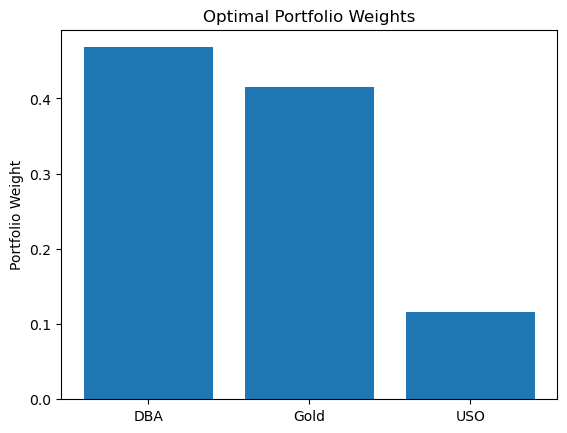

In [80]:
def portfolio_objective(weights, returns, cov_matrix):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Minimize negative Sharpe ratio

# Define the PSO algorithm for portfolio optimization
def pso_portfolio(returns, cov_matrix, num_assets, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities representing portfolio weights
    particles = np.random.rand(num_particles, num_assets)
    particles /= particles.sum(axis=1, keepdims=True)  # Normalize to ensure weights sum to 1
    velocities = np.zeros_like(particles)

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, num_assets))
        r2 = np.random.uniform(0, 1, (num_particles, num_assets))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions and normalize weights
        particles += velocities
        particles /= particles.sum(axis=1, keepdims=True)

        # Evaluate fitness of each particle
        fitness_values = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, -swarm_best_fitness  # Return the positive Sharpe ratio


num_assets = df_return.shape[1]

# Drop NaN values in the returns
#daily_returns = daily_returns.dropna()
daily_returns = df_return 


# Calculate covariance matrix
cov_matrix = np.cov(daily_returns, rowvar=False)


returns = daily_returns.mean().to_numpy()

# Print the results
print("Returns:")
print(daily_returns)
print(returns)
print("\nCovariance Matrix:")
print(cov_matrix)



# Run the PSO algorithm on the portfolio optimization problem
solution, fitness = pso_portfolio(returns, cov_matrix, num_assets)


# Print the solution (portfolio weights) and fitness value (Sharpe ratio)
print('Portfolio Weights:', solution)
print('Sharpe Ratio:', fitness)

# Visualization (2D for simplicity)
fig, ax = plt.subplots()
ax.bar(range(num_assets), solution)
asset_labels = ['DBA', 'Gold',"USO"]
ax.set_xticks(range(len(asset_labels)))
ax.set_xticklabels(asset_labels)
ax.set_ylabel('Portfolio Weight')
ax.set_title('Optimal Portfolio Weights')
plt.show()

#### 